In [1]:
import os
import sys
import csv
import random
import math
import operator
import numpy as np

os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion')
import locomotion
#import locomotion.extendedDTW as extendedDTW
import locomotion.write as write
import locomotion.animal as animal
#from locomotion.animal import throwError
from scipy.signal import savgol_filter
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import import_ipynb

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



importing Jupyter notebook from curve_plotting_v2.ipynb
LOG: Extracting coordinates for Animal CRV_01_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_01_TEST_00...
LOG: Extracting coordinates for Animal CRV_01_TEST_01...
LOG: Extracting coordinates for Animal CRV_01_TEST_02...
LOG: Extracting coordinates for Animal CRV_01_TEST_03...
LOG: Extracting coordinates for Animal CRV_01_TEST_04...
LOG: Extracting coordinates for Animal CRV_01_TEST_05...
LOG: Extracting coordinates for Animal CRV_01_TEST_06...
LOG: Extracting coordinates for Animal CRV_01_TEST_07...
LOG: Extracting coordinates for Animal CRV_01_TEST_08...
LOG: Extracting coordinates for Animal CRV_01_TEST_09...
LOG: Extracting coordinates for Animal CRV_01_TEST_10...
LOG: Extracting coordinates for Animal CRV_01_TEST_11...
LOG: Extracting coordinates for Animal CRV_01_TEST_12...
LOG: Extracting coordinates for Animal CRV_01_TEST_13...
LOG: Extracting coordinates for Animal CRV_01_TEST_14...
LOG: Extracting coordinates fo

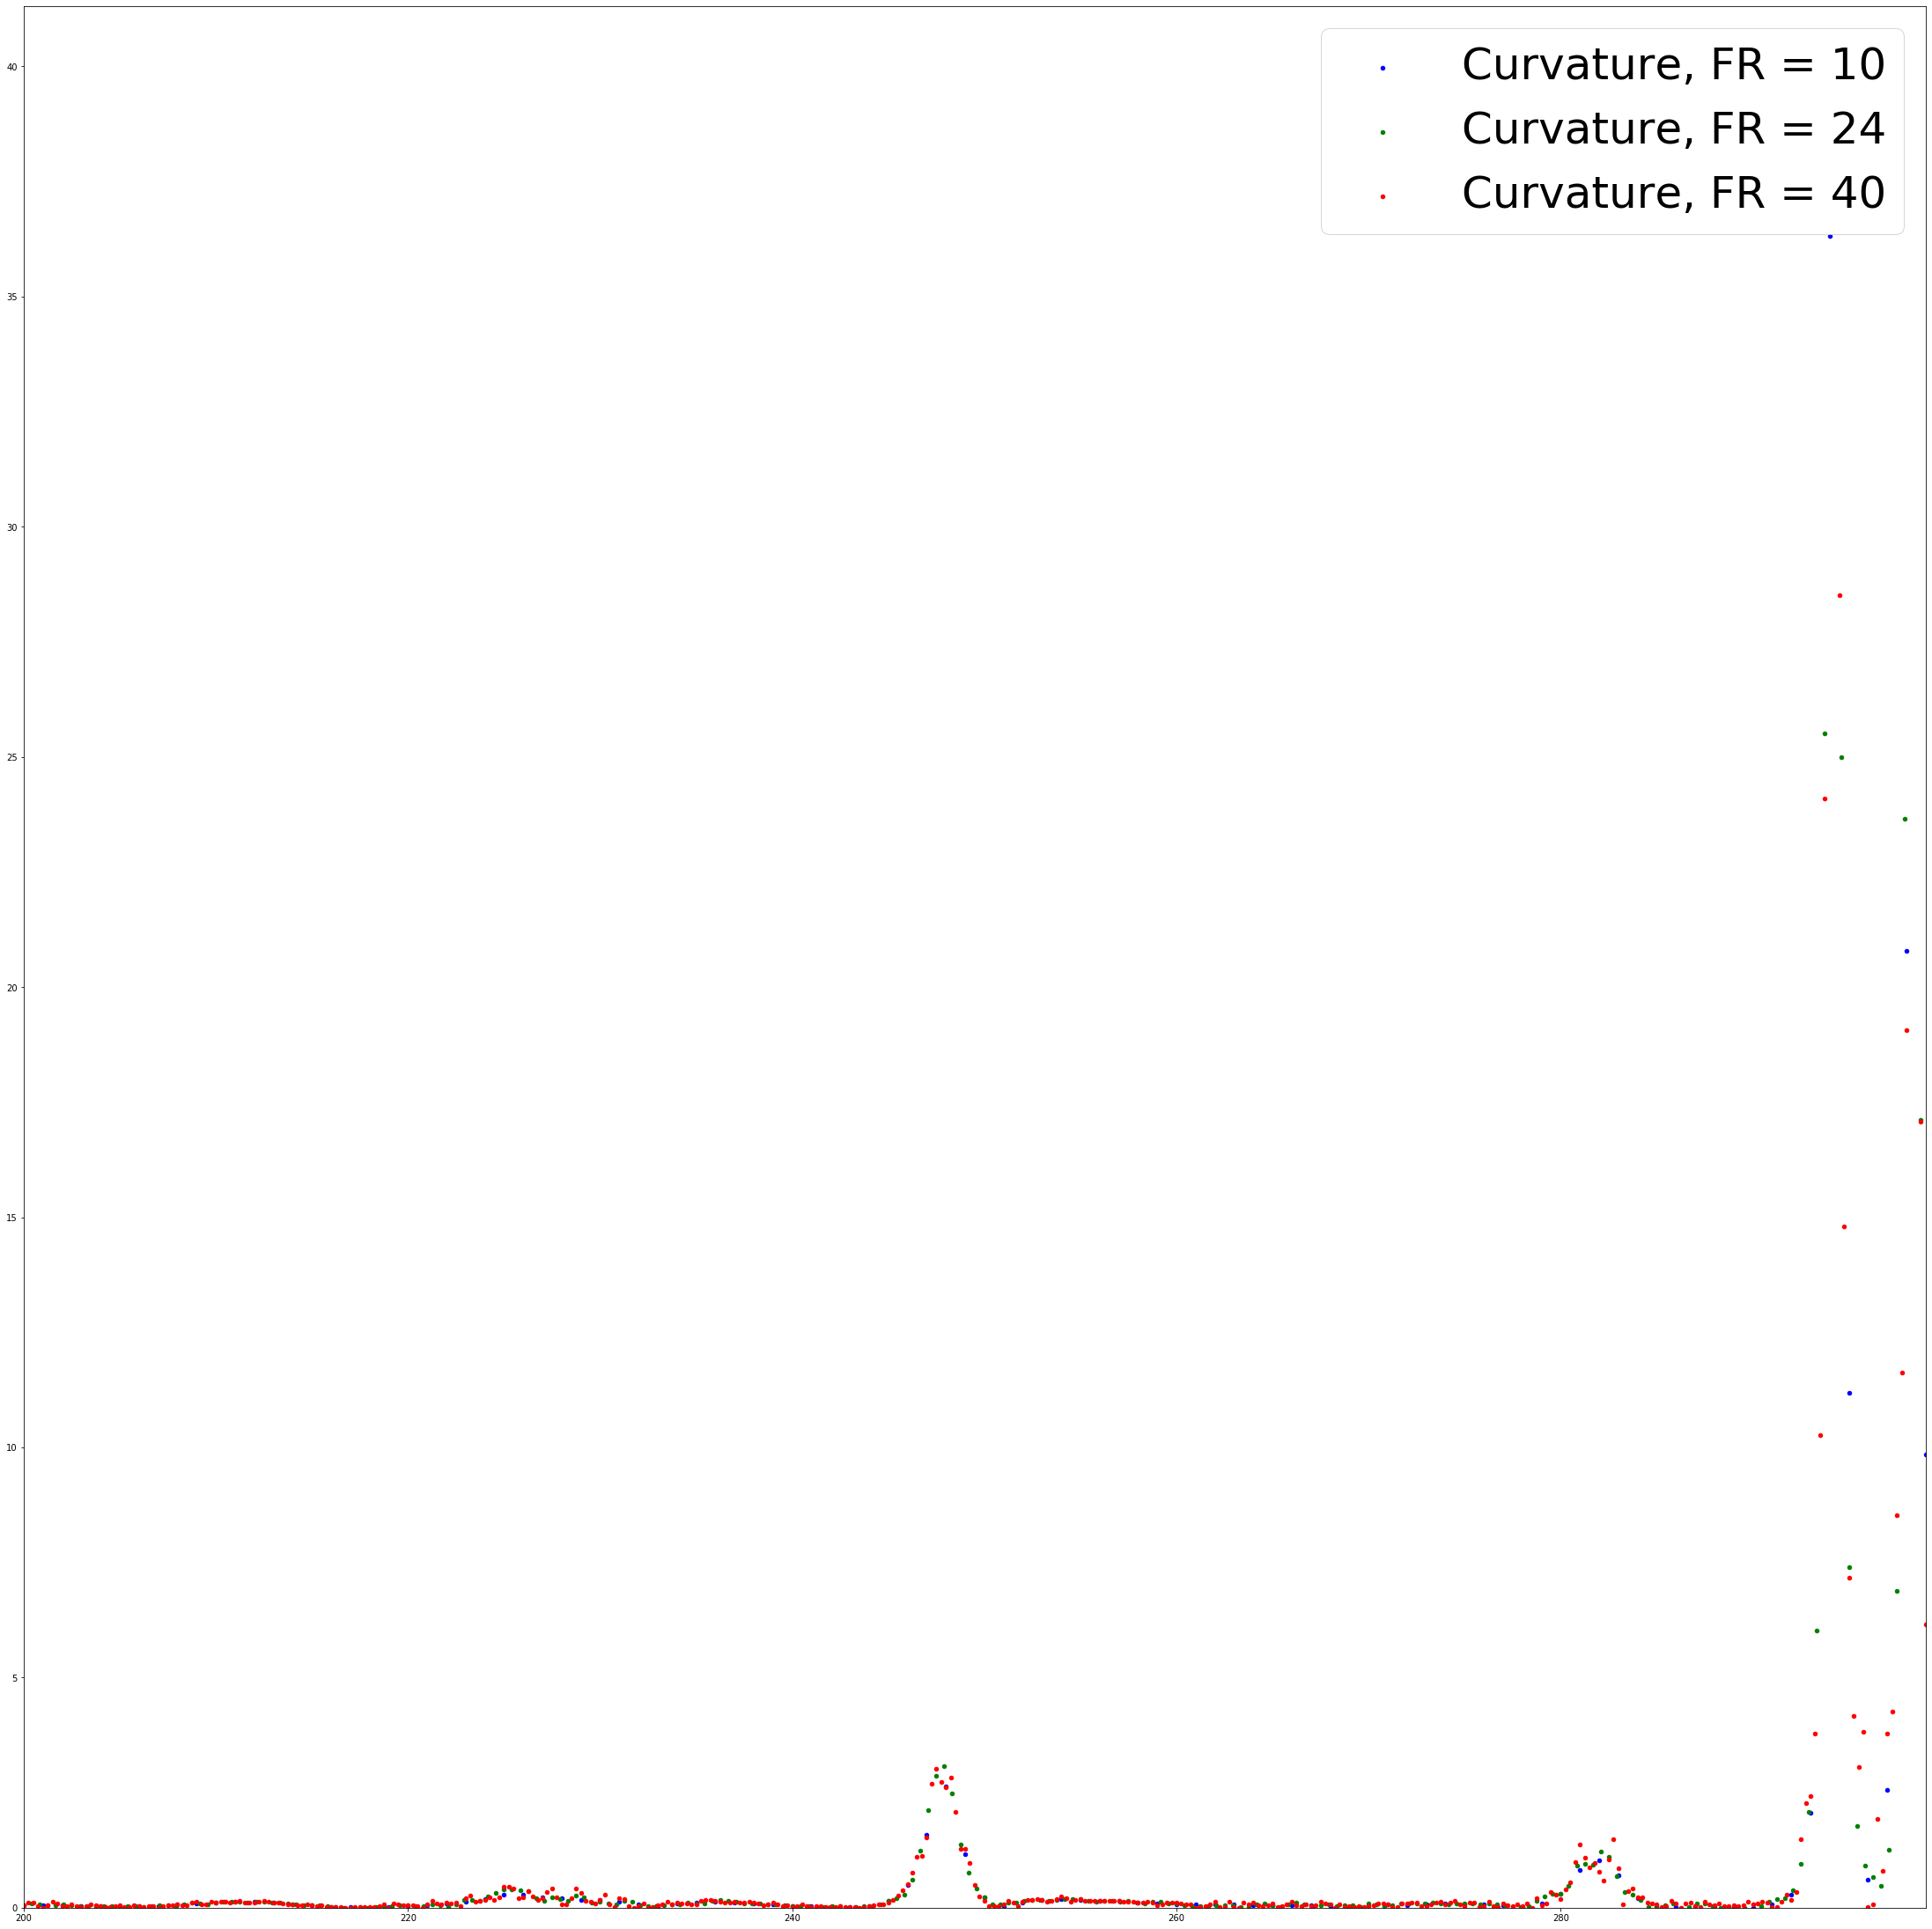

LOG: Extracting coordinates for Animal CRV_01_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_01_TEST_00...
LOG: Extracting coordinates for Animal CRV_01_TEST_01...
LOG: Extracting coordinates for Animal CRV_01_TEST_02...
LOG: Extracting coordinates for Animal CRV_01_TEST_03...
LOG: Extracting coordinates for Animal CRV_01_TEST_04...
LOG: Extracting coordinates for Animal CRV_01_TEST_05...
LOG: Extracting coordinates for Animal CRV_01_TEST_06...
LOG: Extracting coordinates for Animal CRV_01_TEST_07...
LOG: Extracting coordinates for Animal CRV_01_TEST_08...
LOG: Extracting coordinates for Animal CRV_01_TEST_09...
LOG: Extracting coordinates for Animal CRV_01_TEST_10...
LOG: Extracting coordinates for Animal CRV_01_TEST_11...
LOG: Extracting coordinates for Animal CRV_01_TEST_12...
LOG: Extracting coordinates for Animal CRV_01_TEST_13...
LOG: Extracting coordinates for Animal CRV_01_TEST_14...
LOG: Extracting coordinates for Animal CRV_01_TEST_15...
LOG: Extracting coordinates f

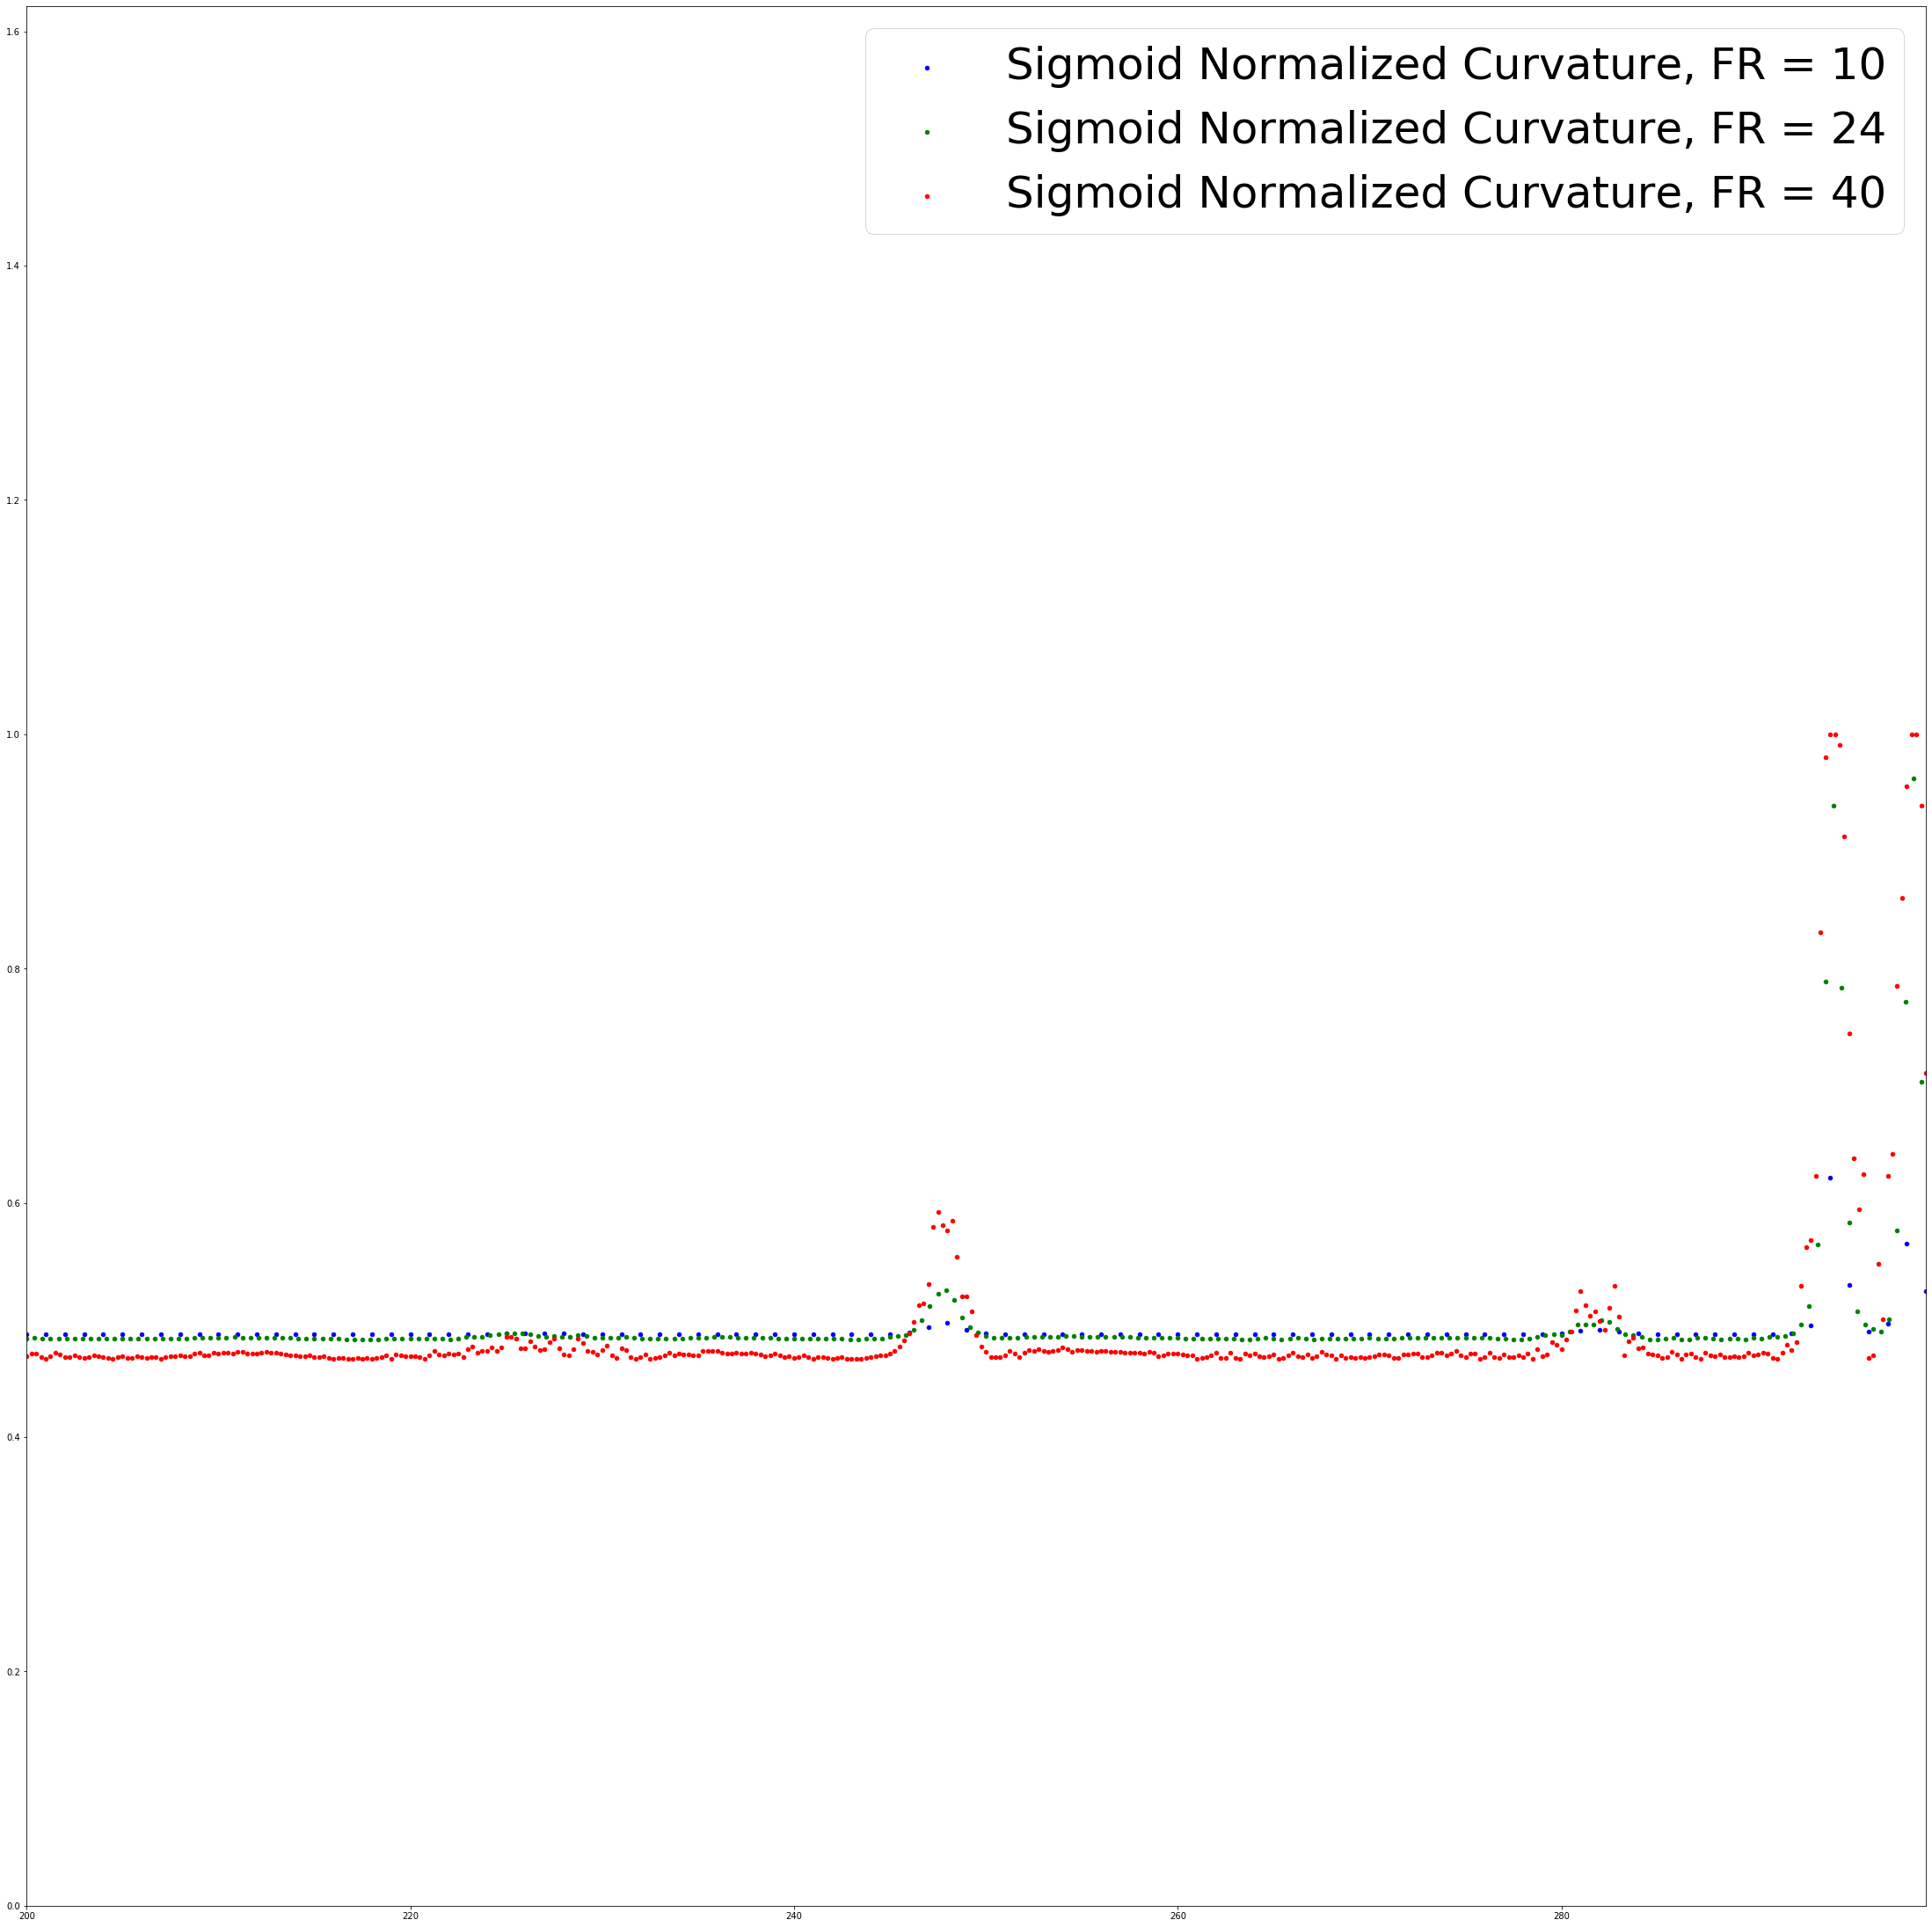

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

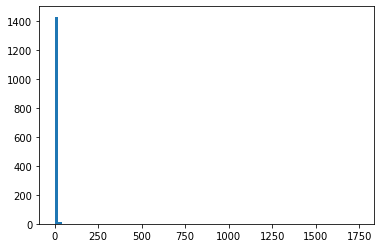

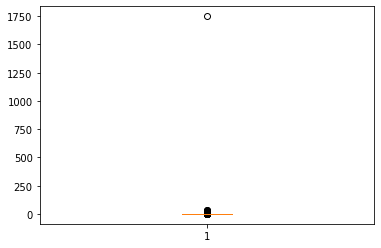

In [2]:
os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests')
import curve_plotting_v2

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

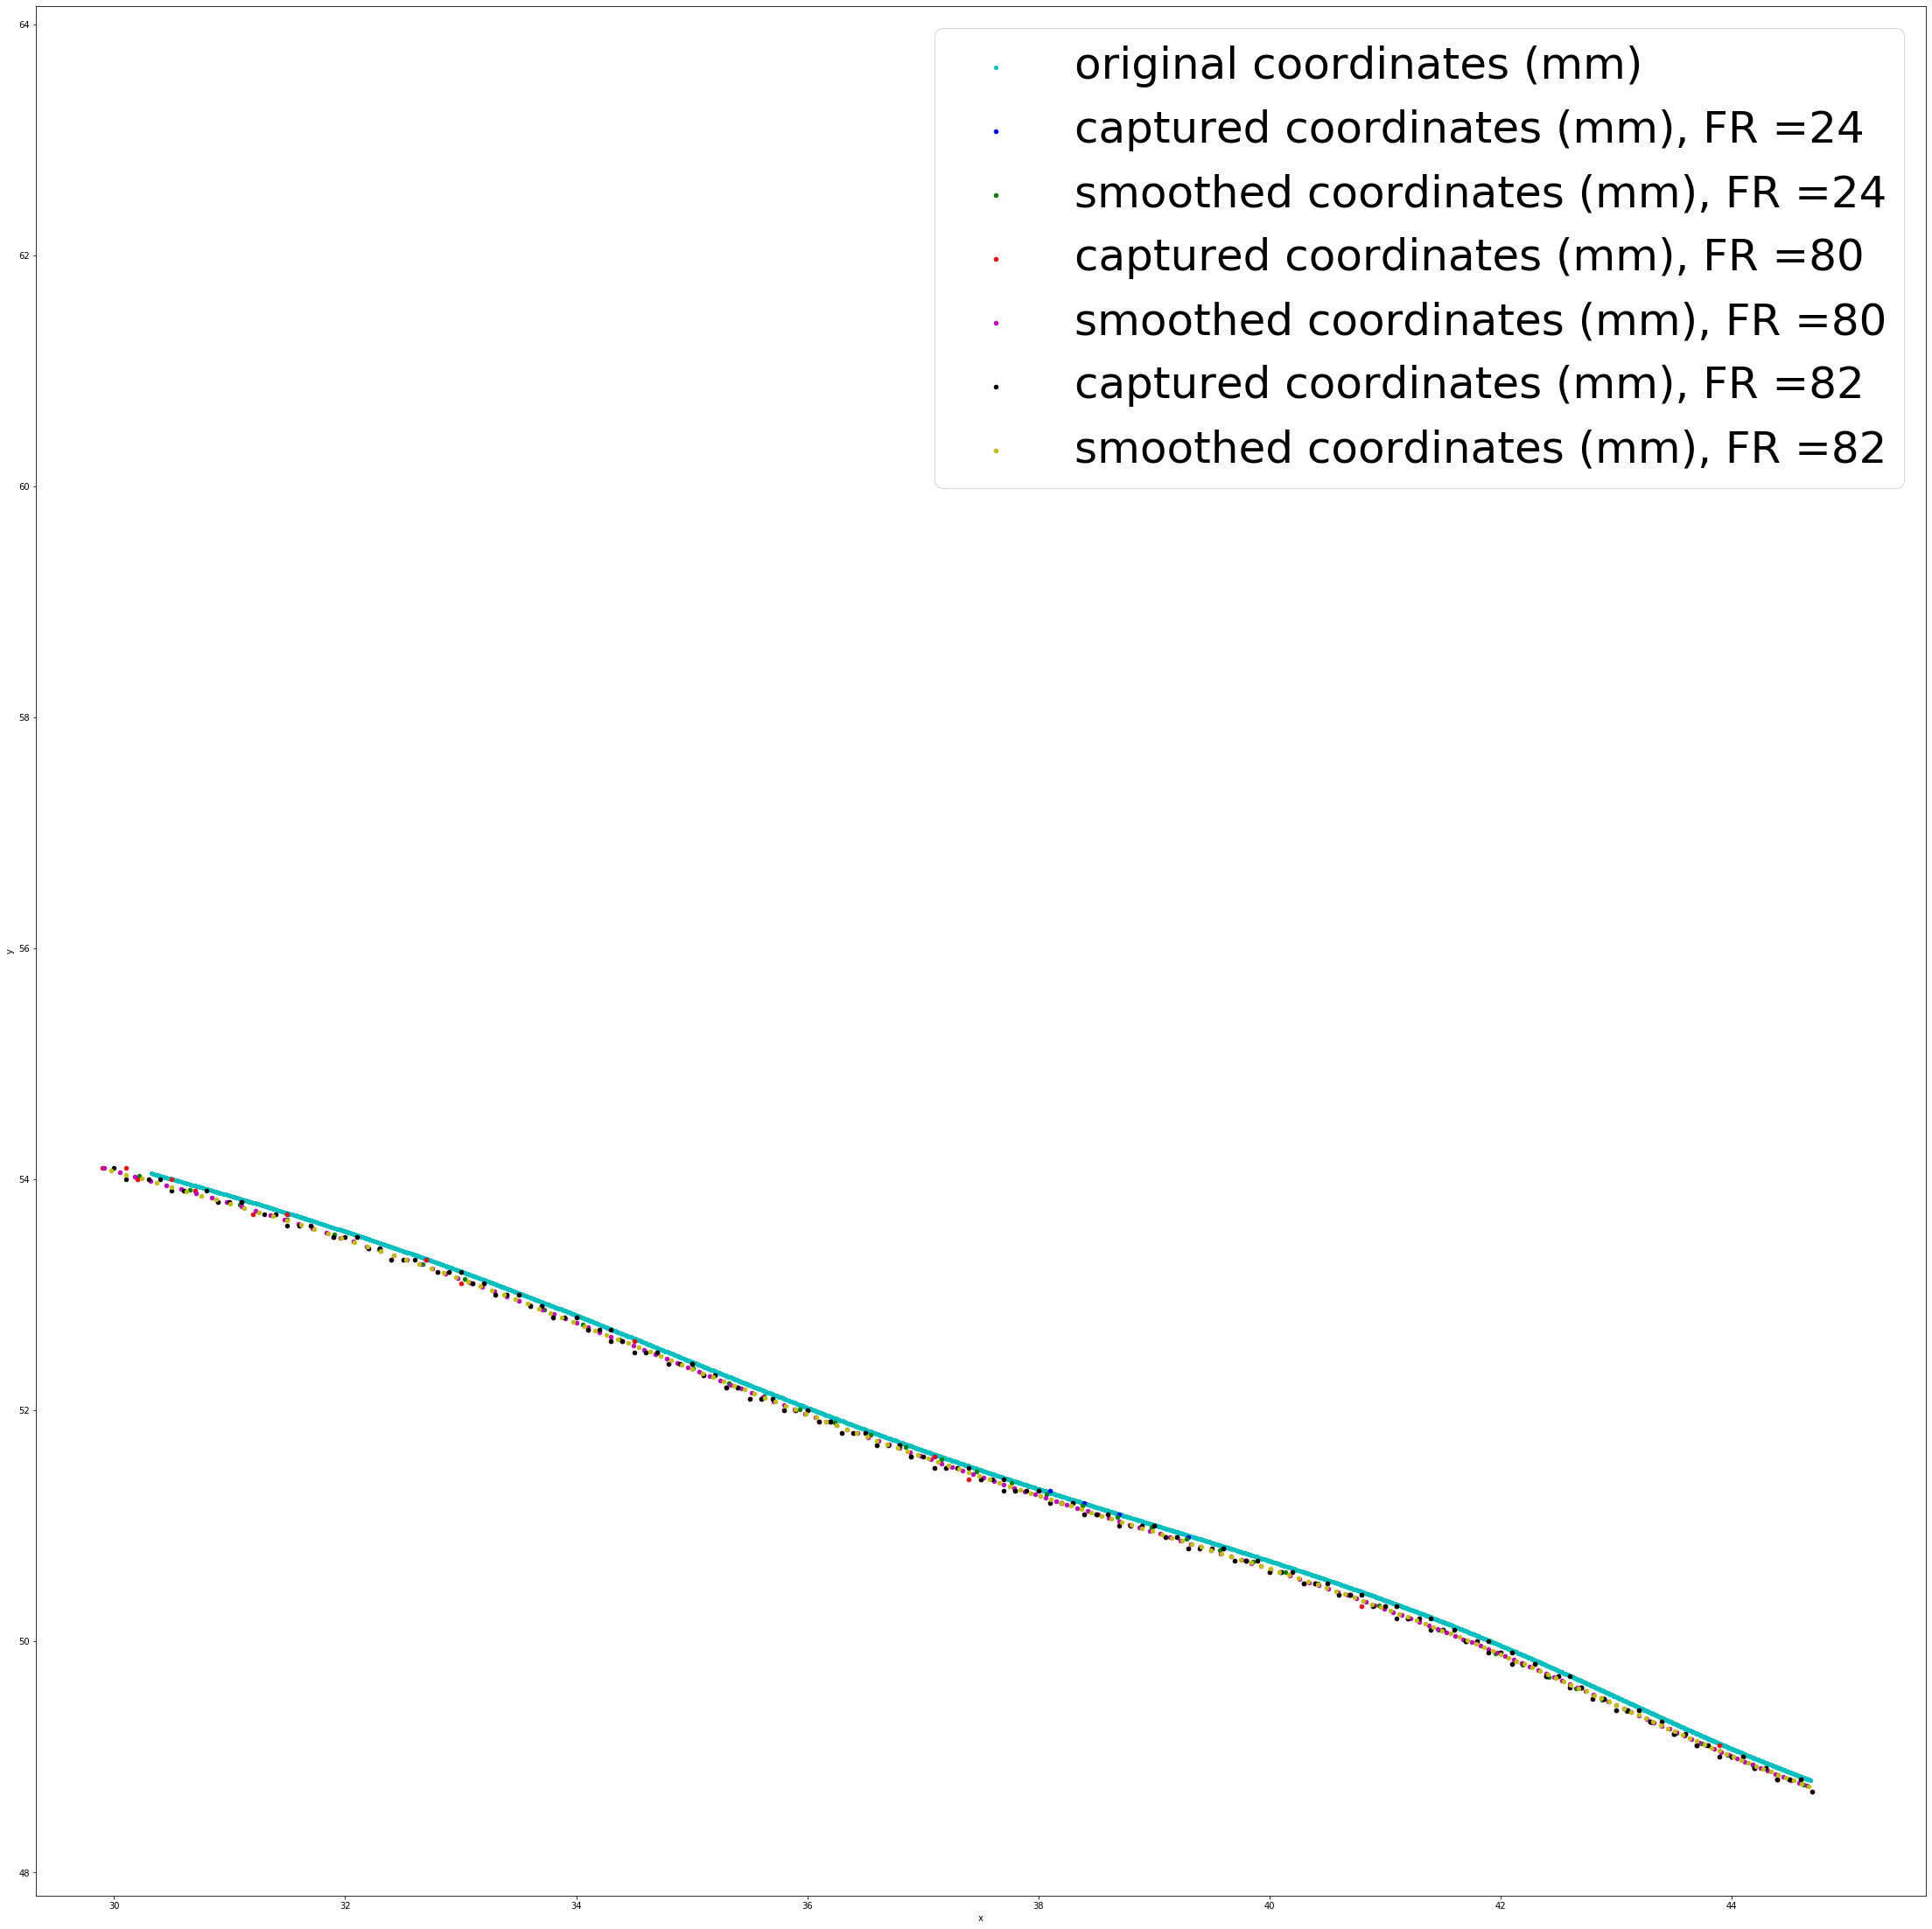

In [3]:
#curves that were smooth before (for robustness tests with mean density =2) 
#and now are non-smooth: 2, 3, 4, 5, 10, 22 (FR<60), 43
#investigate 2, 4, 22
#start with 2: for old tests for FR>50 it was really smooth and converging to BDD = 0.02
#now there are jumps e.g. between 80 and 82
curve_plotting_v2.PlotCurveMultiple(2, [24, 80, 82], 3, 1, mode = 'coords', zoom_range = range(700, 750))

In [4]:
#get alignment graphs

FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)
    
def getAlignment(curve, FR):
    curve_str = '%02d' % curve
    info_file_low = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results/FR_test_lower/CRV_"+curve_str+".json"
    info_file_high = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results/FR_test_higher/CRV_"+curve_str+".json"
    animals_low = animal.get_animal_objs(info_file_low)
    animals_high = animal.get_animal_objs(info_file_high)
    animal_ctrl = animals_high[0]
    if FR in FR_low_sequence:
        test_name = "FR_test_lower"
        idx = FR_low_sequence.index(FR)+1
        animal_obj = animals_low[idx]
    elif FR in FR_high_sequence:
        test_name = "FR_test_higher"
        idx = FR_high_sequence.index(FR)+1
        animal_obj = animals_high[idx]

    trajectory.get_curve_data(animal_obj, col_names=['X', 'Y'])
    trajectory.get_curve_data(animal_ctrl, col_names=['X', 'Y'])
    trajectory.compute_one_bdd(animal_obj, animal_ctrl, ['Curvature', 'Velocity'],0, 1, 0, 1,
                                          'spec', fullmode=True, outdir="/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results/alignment_graphs")



In [5]:
os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion')
import locomotion.trajectory as trajectory


In [6]:
#getAlignment(2, 80)
#getAlignment(2, 82)

#for FR = 82 normalized curvature is consistently (slightly) lower than for FR = 24
#but for FR = 24 normalized curvature is much lower for spikes than for FR = 82
#so probably FR = 24 has a higher mean curvature
#it's sigmoidal normalization though!


#for FR = 80 aligned with FR = 24 it's the same pattern but the differences in curvature are much smaller

#for FR = 80 frame 2815  spike has big diff (0.3), for FR = 82 thats 2885, for FR = 24 thats 845
#another spikr: for fr = 82 3413 (0.35), for fr = 80 its 3330 (and the difference in aligned spikes is smaller = 0.2)

#velocity: small dip at 2700-2900 (for FR = 82)
#maybe check mean curvature, get curvature (and velocity) stats

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

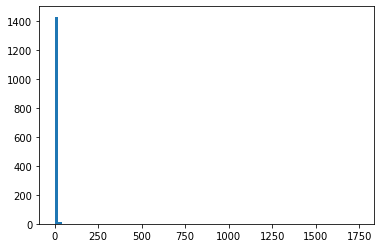

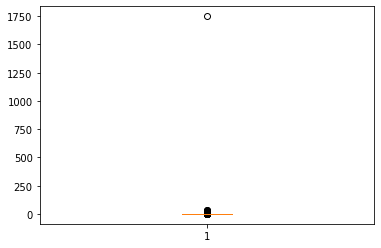

46.16756499473229

In [7]:
#function to get curvature and velocity stats
import statistics as st
curve2_fr24_curv = curve_plotting_v2.GetCurveStats(2, 24, 3, 1, mode = 'curvature')
max(curve2_fr24_curv)
st.stdev(curve2_fr24_curv)

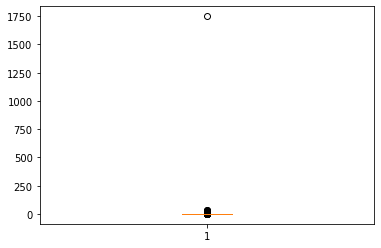

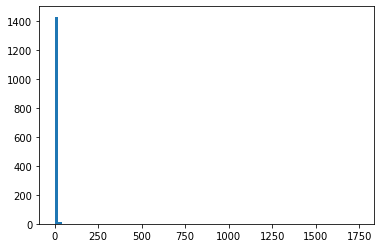

mean = 1.9867046745329644
median = 0.0925105810158961
standard deviation = 46.16756499473229
quartiles = [0.03046421 0.09251058 0.33232241]


In [8]:
#curve2_fr24_curv_no_outliers
plt.boxplot(curve2_fr24_curv)
plt.show()
plt.hist(curve2_fr24_curv, bins = 80)
plt.show()
import statistics as st
print( 'mean = ' + str(st.mean(curve2_fr24_curv)))
print('median = ' + str(st.median(curve2_fr24_curv)))
print( 'standard deviation = ' + str(st.stdev(curve2_fr24_curv)))
print('quartiles = ' + str(np.percentile(curve2_fr24_curv, [25, 50, 75])))
#print('quantiles = ' + str(st.quantiles(curve2_fr24_curv, n = 4)))

#mean = 1.9867046745329644
#median = 0.0925105810158961
#standard deviation = 46.16756499473229
#quartiles = [0.03046421 0.09251058 0.33232241]

#plt.boxplot(np.log(curve2_fr24_curv))

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

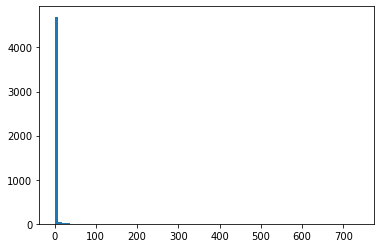

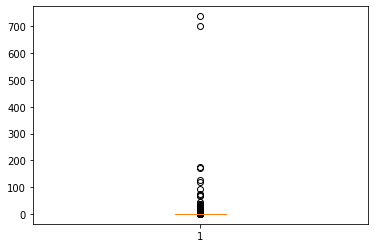

mean = 1.3966943538346883
median = 0.13514983011195614
standard deviation = 15.742323979646347
quartiles = [0.04423838 0.13514983 0.48003665]


In [9]:
curve2_fr80_curv = curve_plotting_v2.GetCurveStats(2, 80, 3, 1, mode = 'curvature')
print( 'mean = ' + str(st.mean(curve2_fr80_curv)))
print('median = ' + str(st.median(curve2_fr80_curv)))
print( 'standard deviation = ' + str(st.stdev(curve2_fr80_curv)))
print('quartiles = ' + str(np.percentile(curve2_fr80_curv, [25, 50, 75])))

#mean = 1.3966943538346883
#median = 0.13514983011195614
#standard deviation = 15.742323979646347
#quartiles = [0.04423838 0.13514983 0.48003665]

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

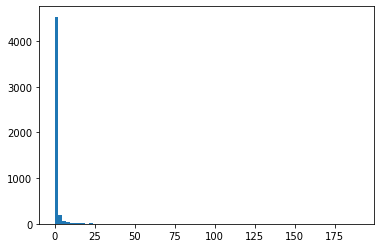

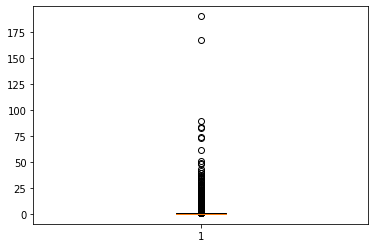

mean = 1.105302399001775
median = 0.1367643711445738
standard deviation = 5.58659074370509
quartiles = [0.04515624 0.13676437 0.49387434]


In [10]:
curve2_fr82_curv = curve_plotting_v2.GetCurveStats(2, 82, 3, 1, mode = 'curvature')
curve2_fr82_curv 
print( 'mean = ' + str(st.mean(curve2_fr82_curv)))
print('median = ' + str(st.median(curve2_fr82_curv)))
print( 'standard deviation = ' + str(st.stdev(curve2_fr82_curv)))
print('quartiles = ' + str(np.percentile(curve2_fr82_curv, [25, 50, 75])))

#mean = 1.105302399001775
#median = 0.1367643711445738
#standard deviation = 5.58659074370509
#quartiles = [0.04515624 0.13676437 0.49387434]

In [11]:
min(curve2_fr82_curv )

0

In [12]:
#FR = 24

#mean = 1.9867046745329644
#median = 0.0925105810158961
#standard deviation = 46.16756499473229
#quartiles = [0.03046421 0.09251058 0.33232241]

#FR = 80

#mean = 1.3966943538346883
#median = 0.13514983011195614
#standard deviation = 15.742323979646347
#possibly because there are a few really high outliers that drive sd up
#quartiles = [0.04423838 0.13514983 0.48003665]

#FR = 82

#mean = 1.105302399001775
#median = 0.1367643711445738
#standard deviation = 5.58659074370509
#quartiles = [0.04515624 0.13676437 0.49387434]

#for FR = 82 normalized curvature is consistently (slightly) lower than for FR = 24
#quartiles are bigger for 
#and for FR = 82 the sd os small and so x values smaller than mean x are mapped to 
#small sigmoid values (bc e raised to exp is bigger) ie smaller sigmoid values than FR = 24 which has much higher sd
#for FR = 80 they are bigger, and FR = 82 even bigger

#but for FR = 24 normalized curvature is much lower for spikes than for FR = 82
#check which one has higher percemtage of outliers (in normalized curvature)

# FR = 24 has a really high outlier (1450) so it drives the sd up and FR = 80 has 2 high outliers (700) which also drives sd up
#so FR = 24 and 80 are similar because their sd is higher, and given that it is higher normalized data is smaller
# (x - mean divided by large sd) and so sigmoid normalized data is also small (closer to 0.5-0.7 than 1)
# so it's all because of high outliers
# now plot the areas with outlier curvature to figure out what's going on
#so outliers themselves dont affect bdd but they do indirectly by determining normalization parameters (high sd)


#for FR = 80 aligned with FR = 24 it's the same pattern but the differences in curvature are much smaller


np.percentile(curve2_fr24_curv, 95)
#3.05

np.percentile(curve2_fr82_curv, 95)
#3.89
#probably more high (above certain threshold, they are all normalized with sigmoid to app. 1) outliers for fr = 82


np.percentile(curve2_fr24_curv, 10)
#0.010

np.percentile(curve2_fr82_curv, 10)
#0.015
#(len(filter(outlier, curve2_fr82_curv)))/(60*82)

0.01505413969215977

In [13]:
# now plot the areas with outlier curvature to figure out what's going on
curve2_fr80_curv.index(max(curve2_fr80_curv))
#97
curve2_fr24_curv.index(max(curve2_fr24_curv))
#29

29

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

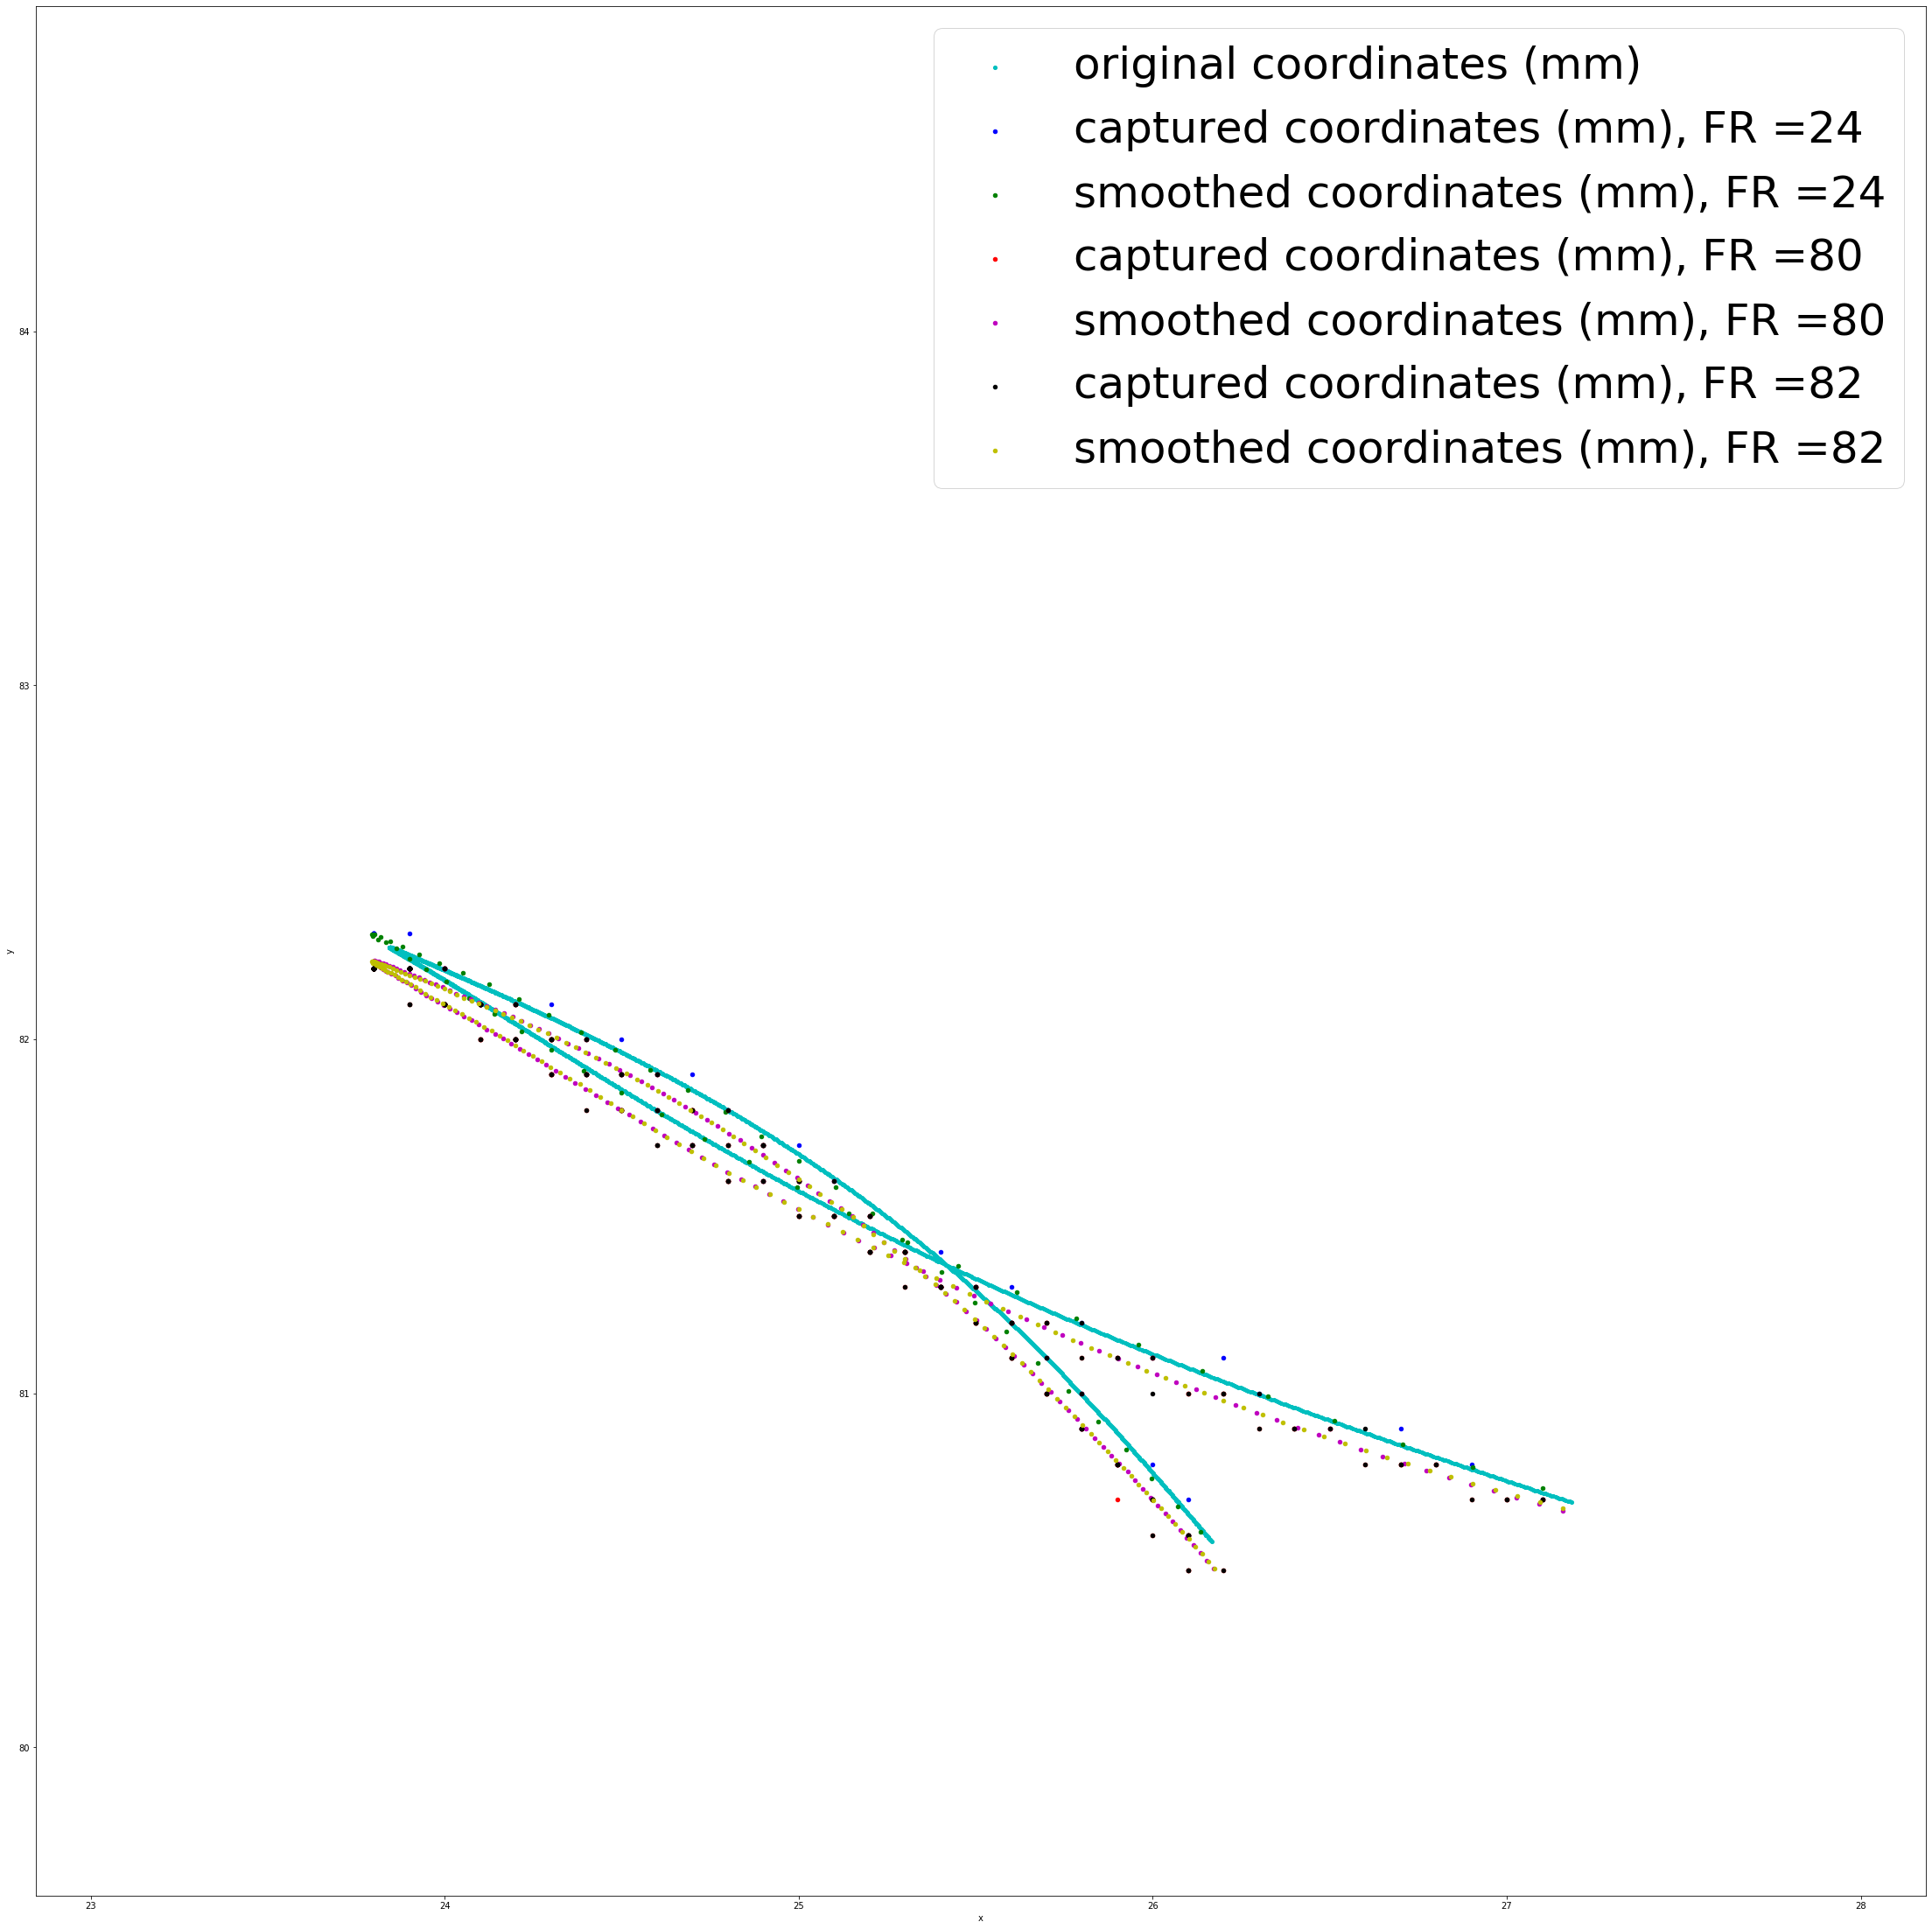

In [14]:
curve_plotting_v2.PlotCurveMultiple(2, [24, 80, 82], 3, 1, mode = 'coords', zoom_range = range(0, 60))

In [15]:
#unrealistically sharp turn
#out of range, modify the plotting function
#check curvature for the original curve

#the problem is that the coordinates are captured differently (giving diff max curvature) for different frame rates
#the original max curvature is C = 1192

maxC_list = [80.05108988190511,
 282.6381047948847,
 1192.3430357173752,
 180.7790058631567,
 537.6096875391751,
 675.9918977813342,
 42.830224054102615,
 1475.7119037249718,
 153.599729268789,
 5.961063148118167,
 514.1227013450349,
 57.66966913469227,
 315.0975947399504,
 141.28169202695855,
 189.9972939036731,
 3.908844209477621,
 15.124396683173346,
 29.702150134127354,
 3.318316252821498,
 144.94102697477118,
 13.292551198733575,
 6228.934173268035,
 881.735352697215,
 1063.894092163375,
 279.756746185578,
 86.46217908464929,
 1.7704563088422964,
 46.8684273595113,
 66.43325780254528,
 33.68616502396259,
 312.4732201360327,
 140.19991795965862,
 51.67187626041652,
 3.8176932691709076,
 1199.4077454707153,
 1519.1442122173794,
 827.6206128091347,
 23.59626647669985,
 33.357438752263306,
 49.905703495597805,
 867.777092273575,
 1091.8811097400715,
 13.432142962522285,
 686.0329653163664,
 0.3035136890997121,
 10.89800578089153,
 132.78074172417024,
 70.47627453625326,
 408.7815822354391,
 1179.066227650275]

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

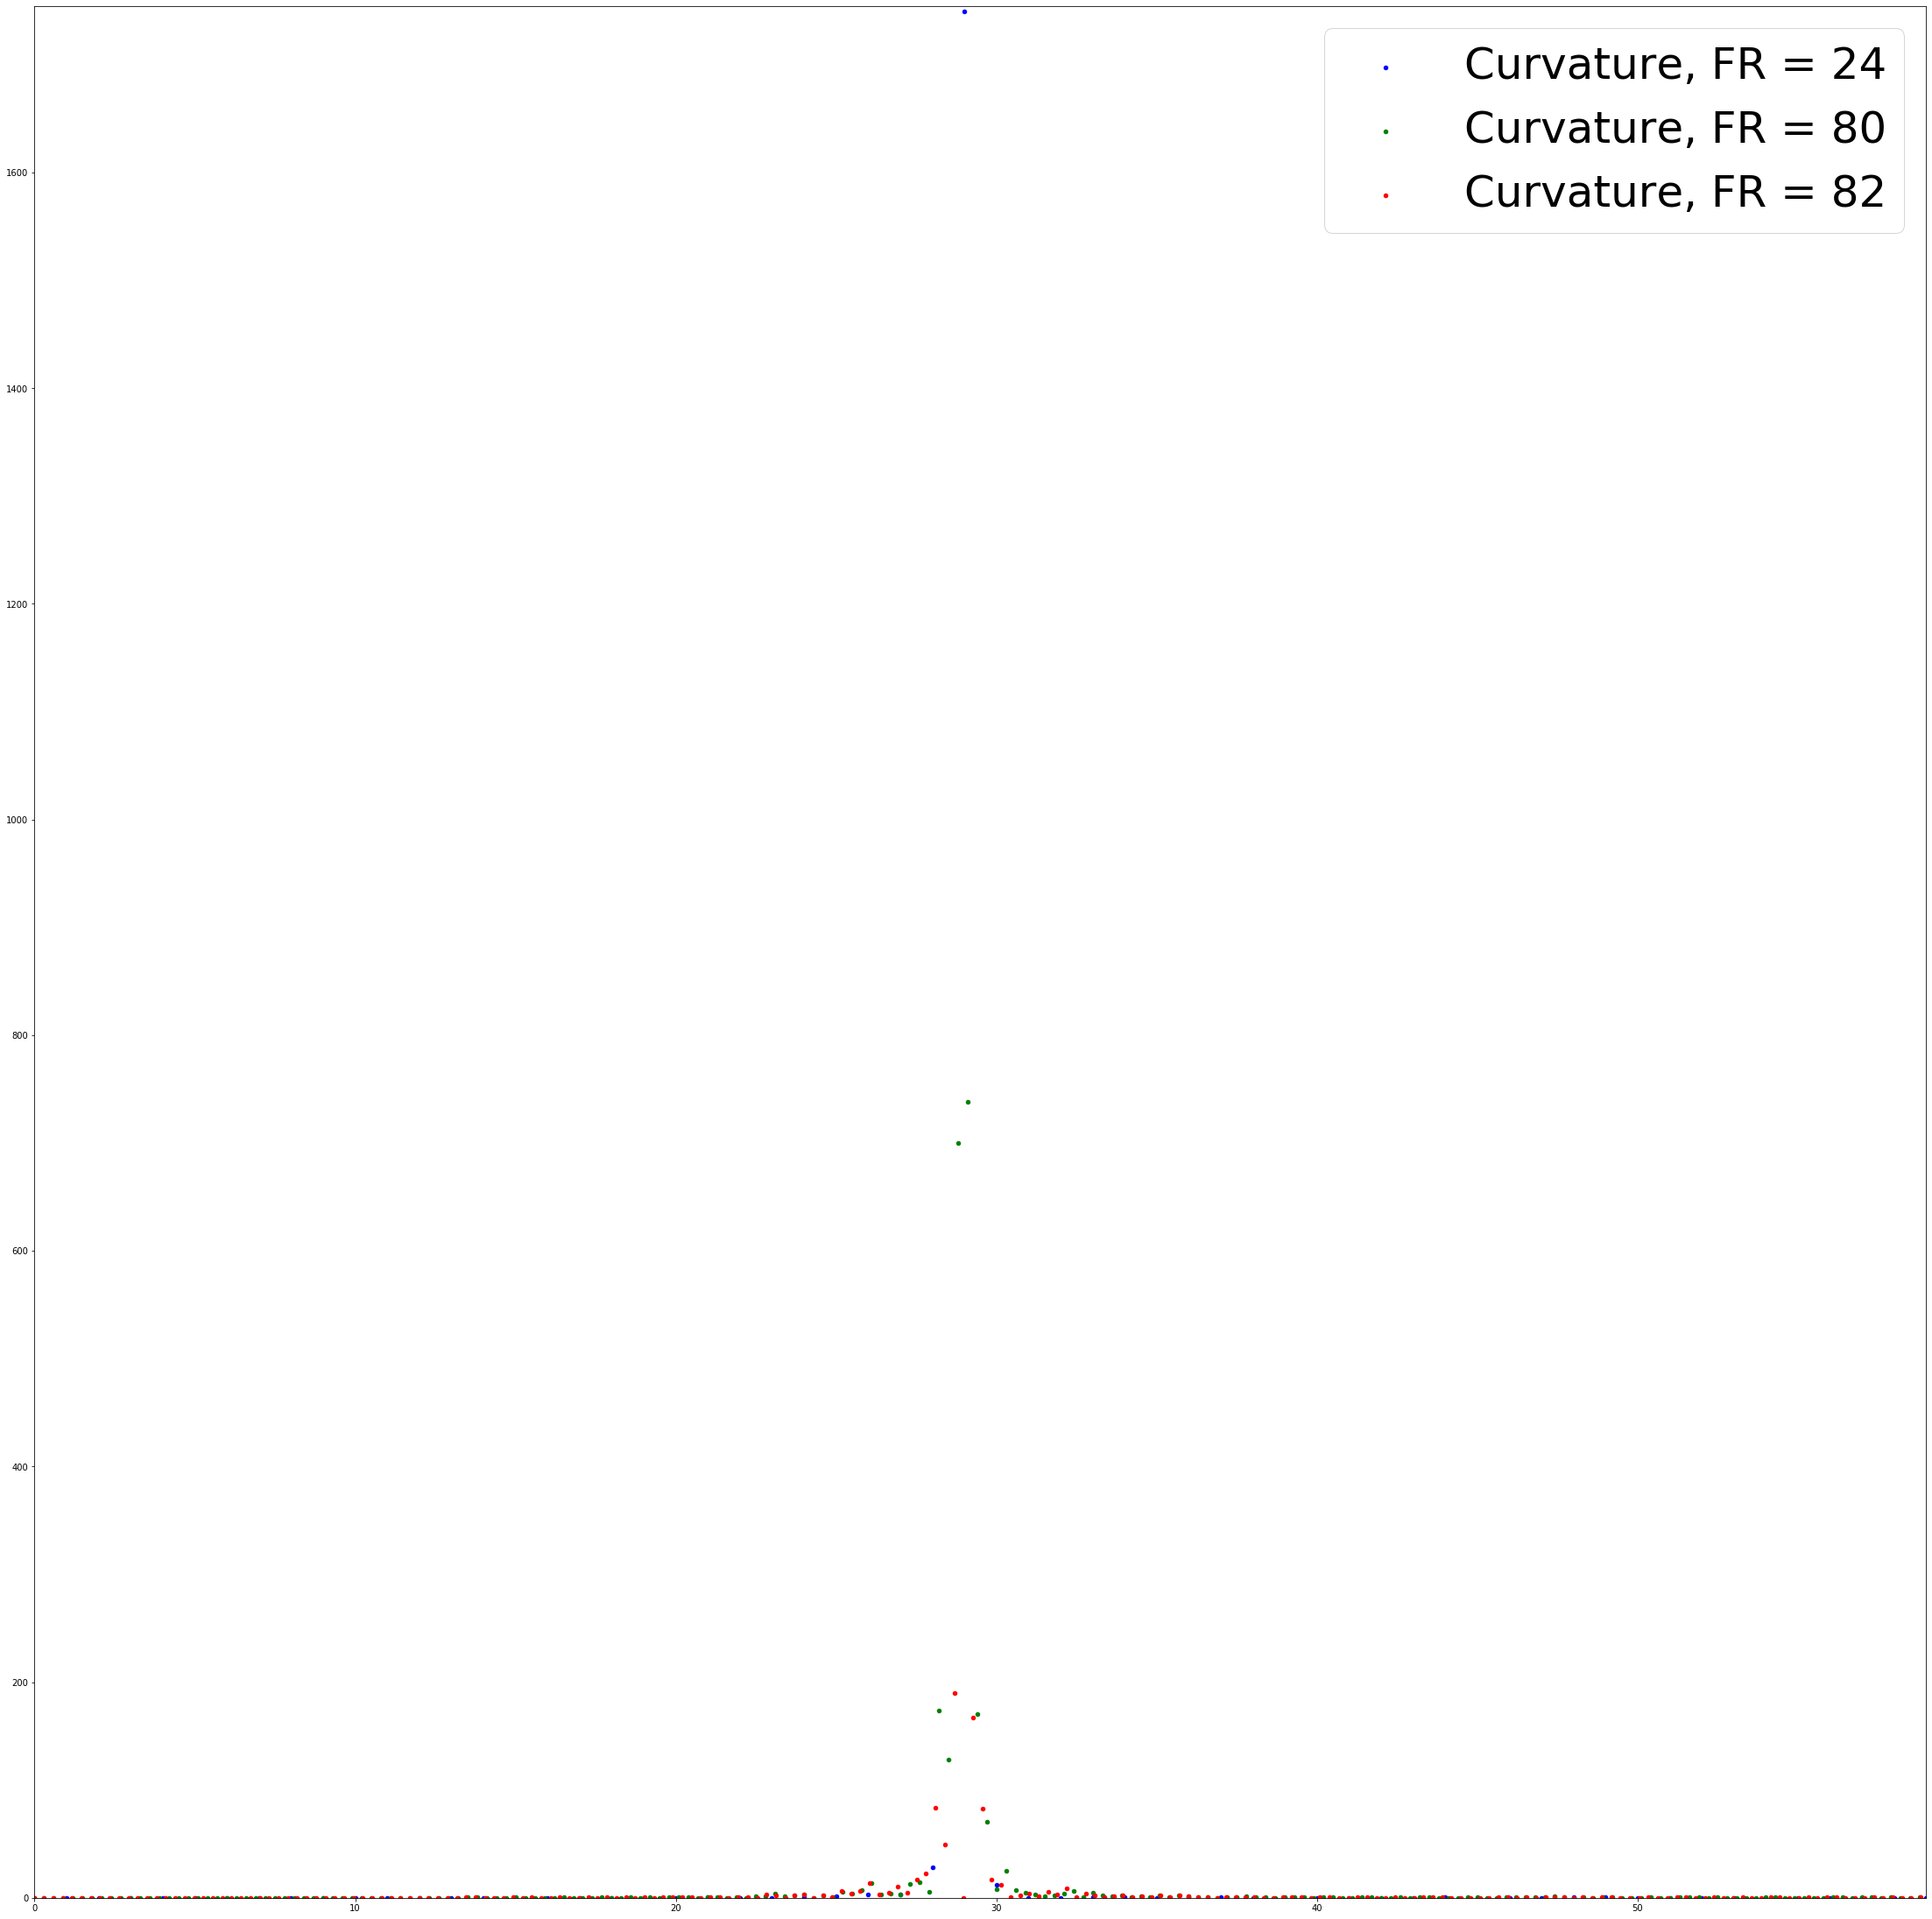

In [16]:
curve_plotting_v2.PlotCurveMultiple(2, [24, 80, 82], 3, 1, mode = 'curvature', zoom_range = range(0, 60))

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

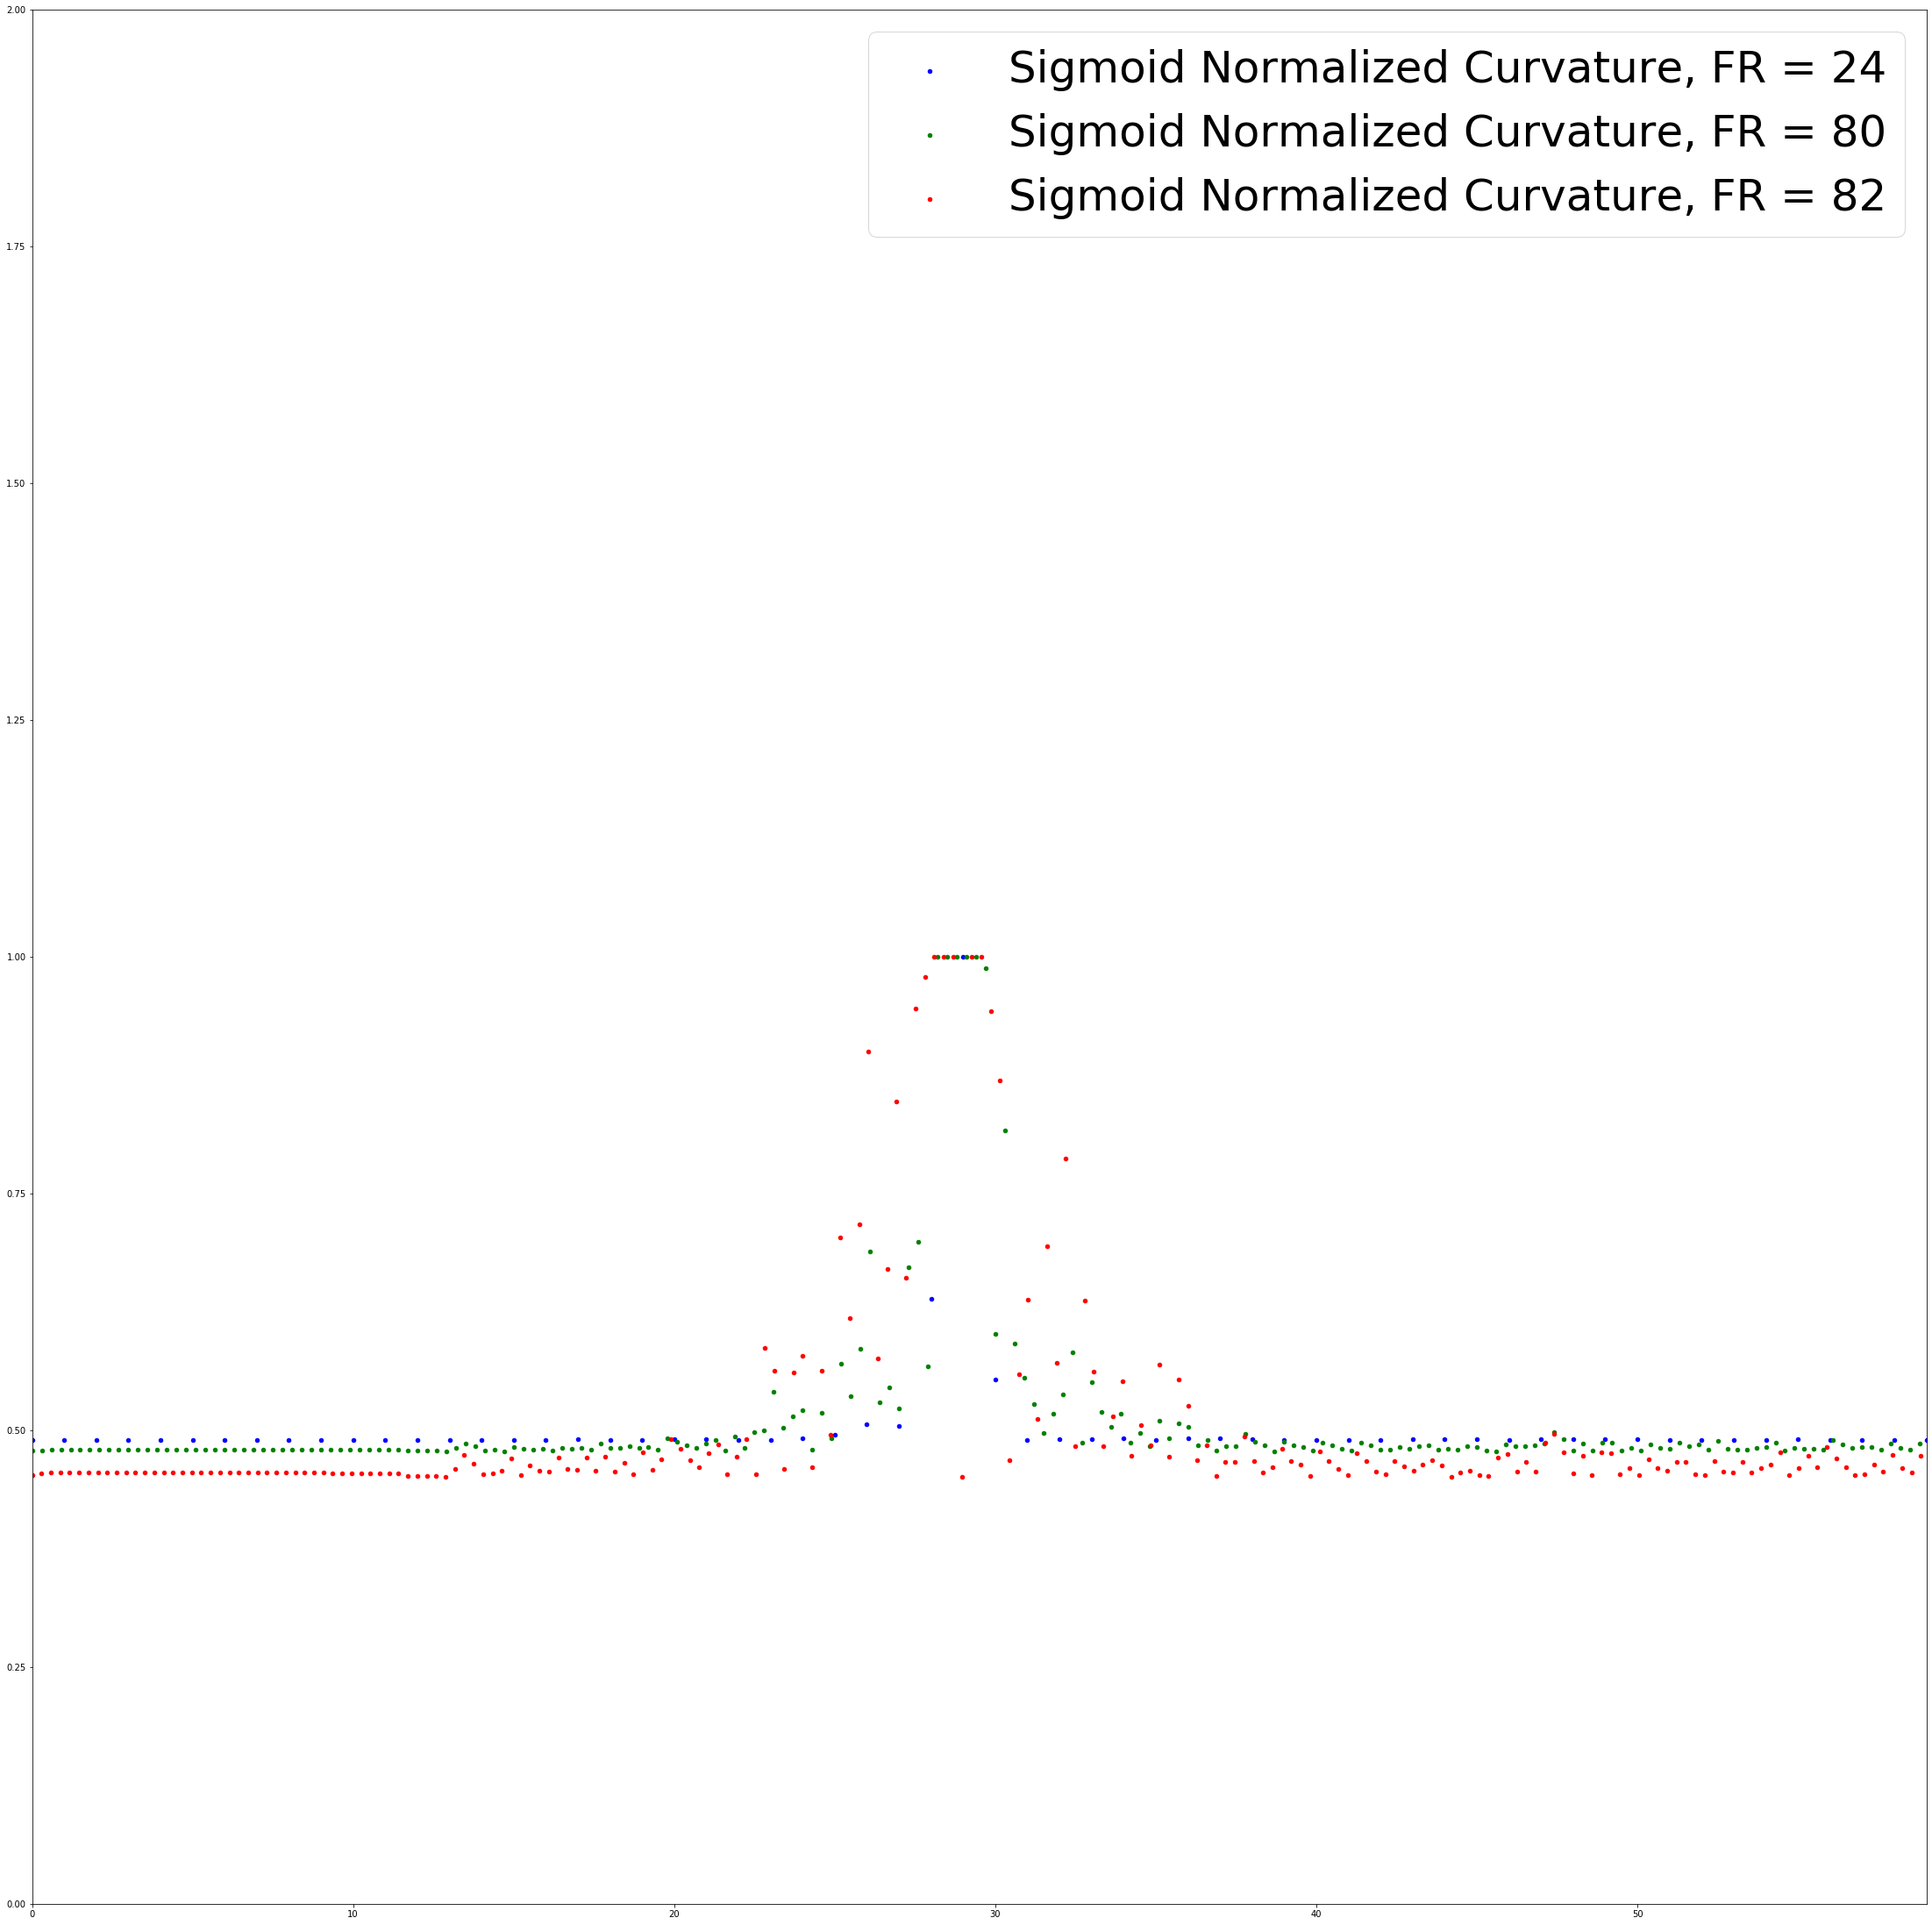

In [19]:
curve_plotting_v2.PlotCurveMultiple(2, [24, 80, 82], 3, 1, mode = 'sigmoid normalized curvature', zoom_range = range(0, 60))

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

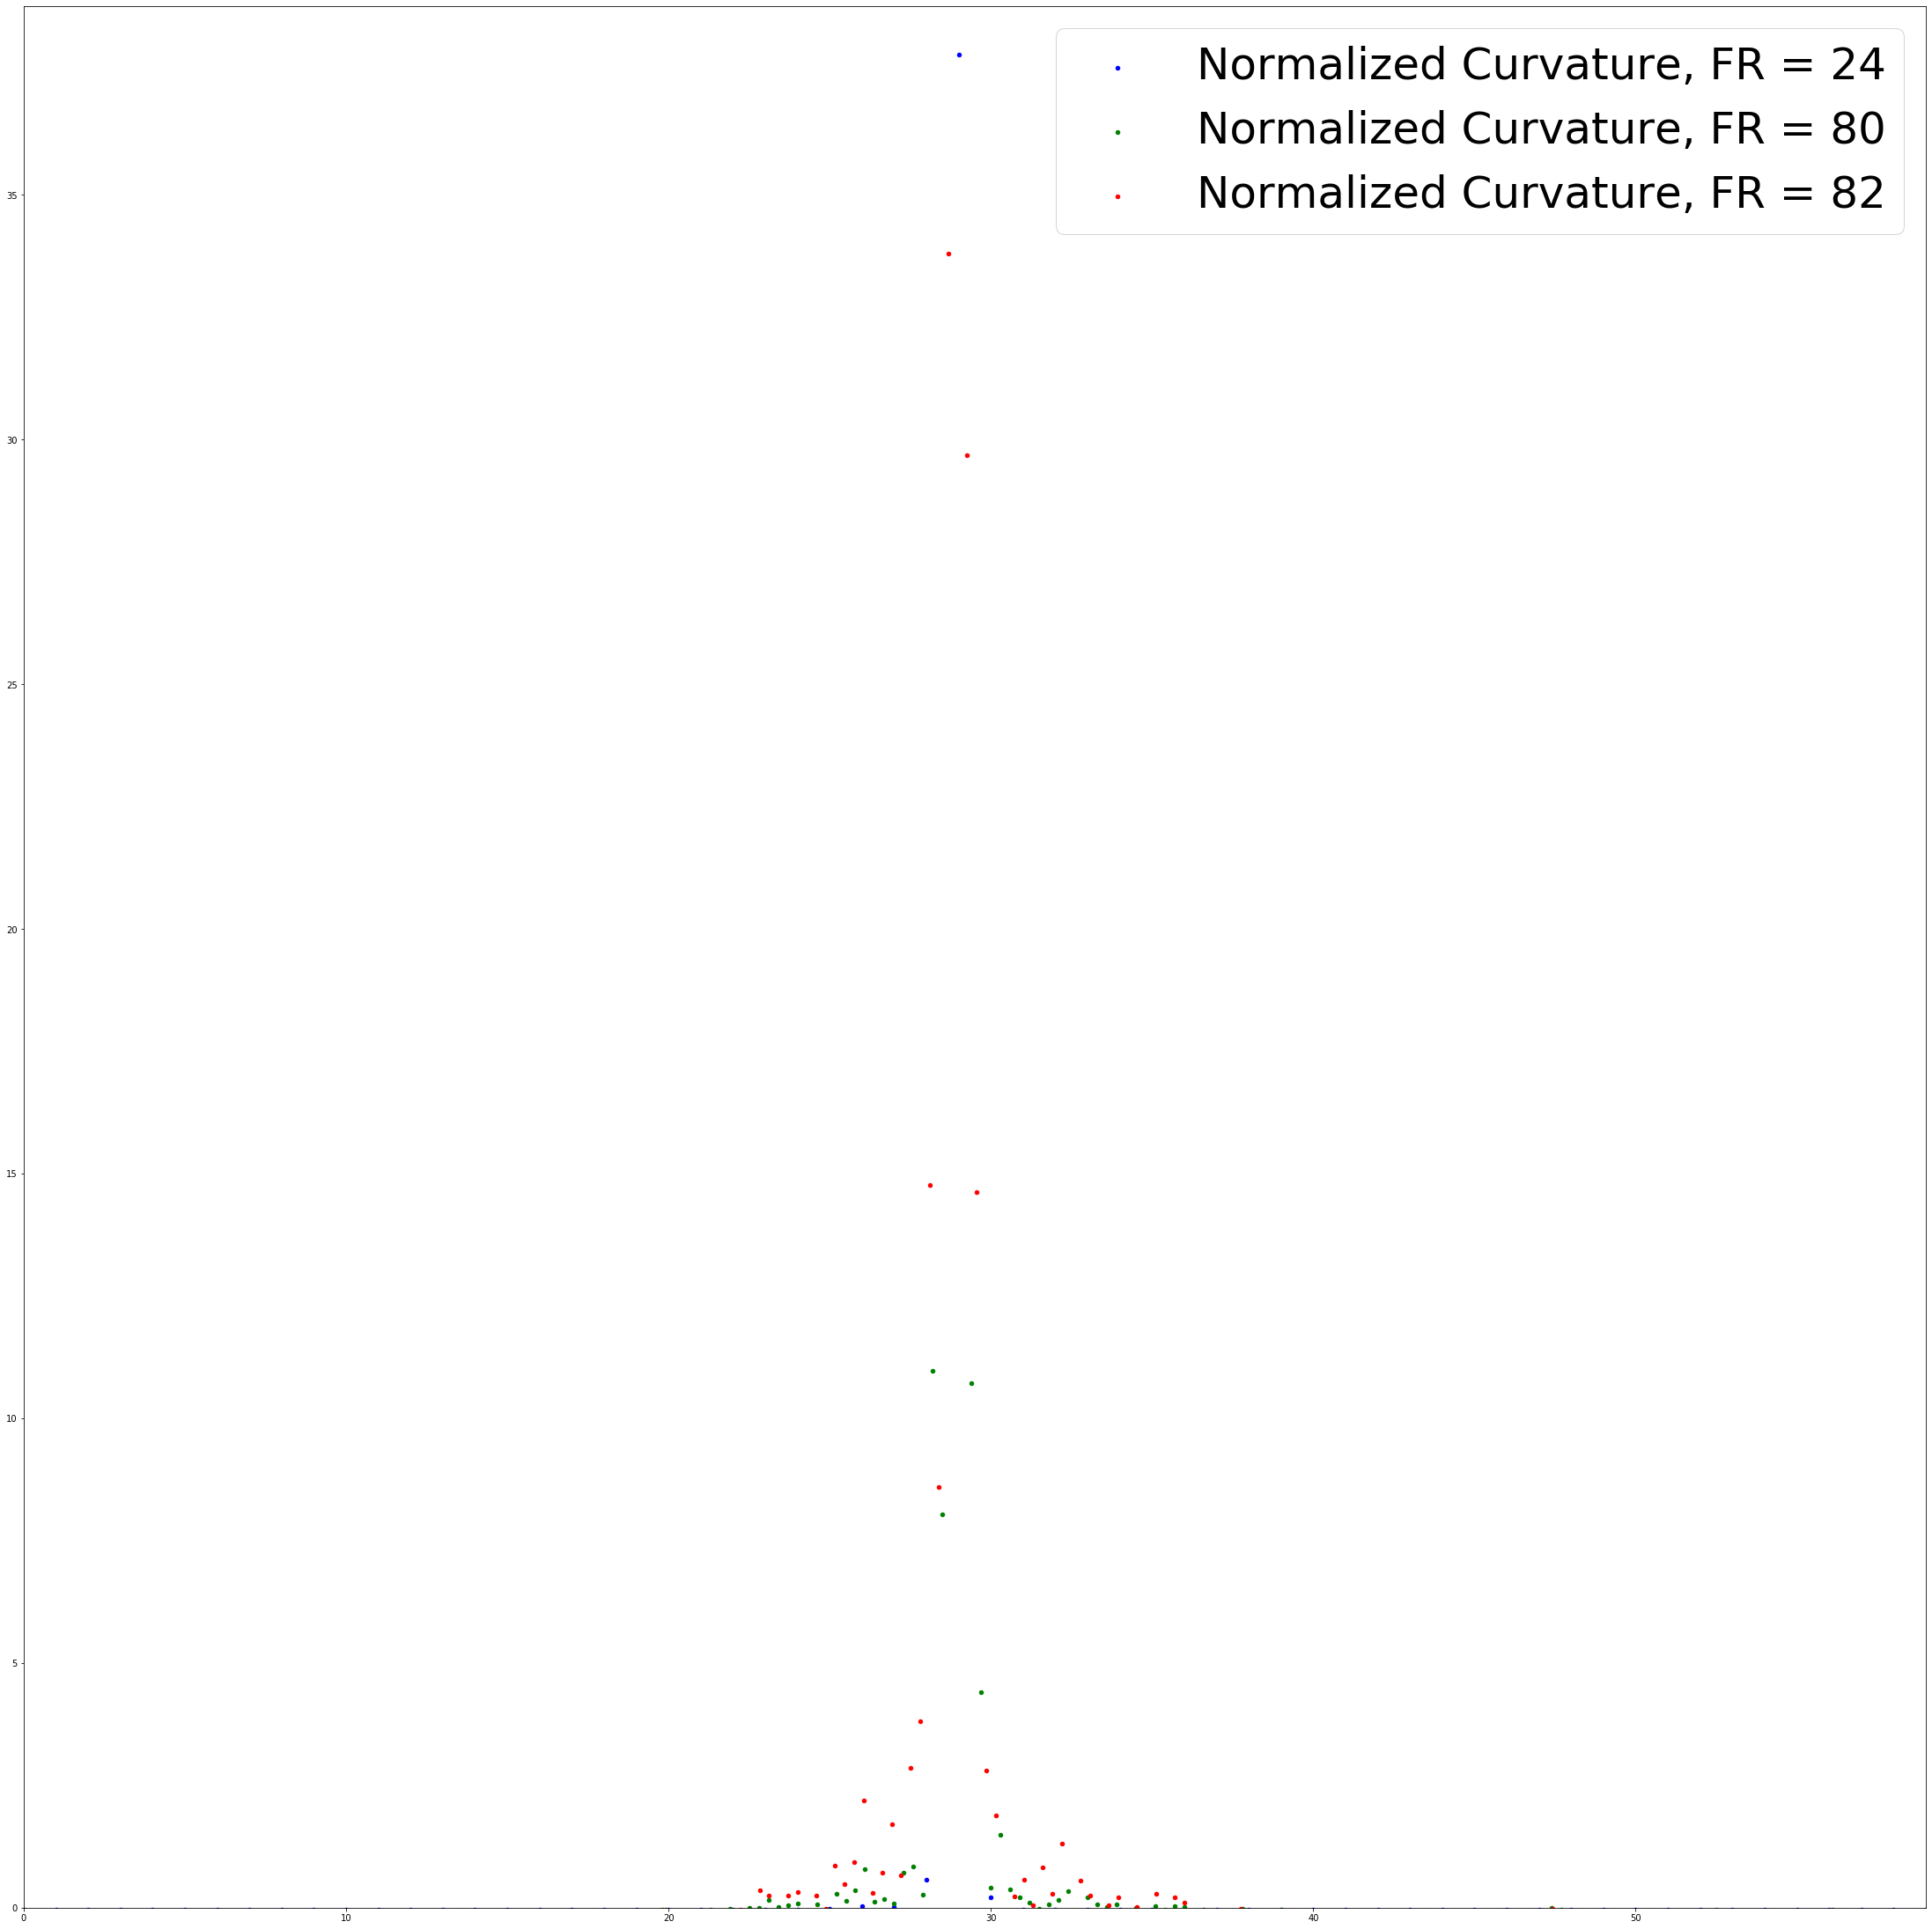

In [20]:
curve_plotting_v2.PlotCurveMultiple(2, [24, 80, 82], 3, 1, mode = 'normalized curvature', zoom_range = range(0, 60))

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

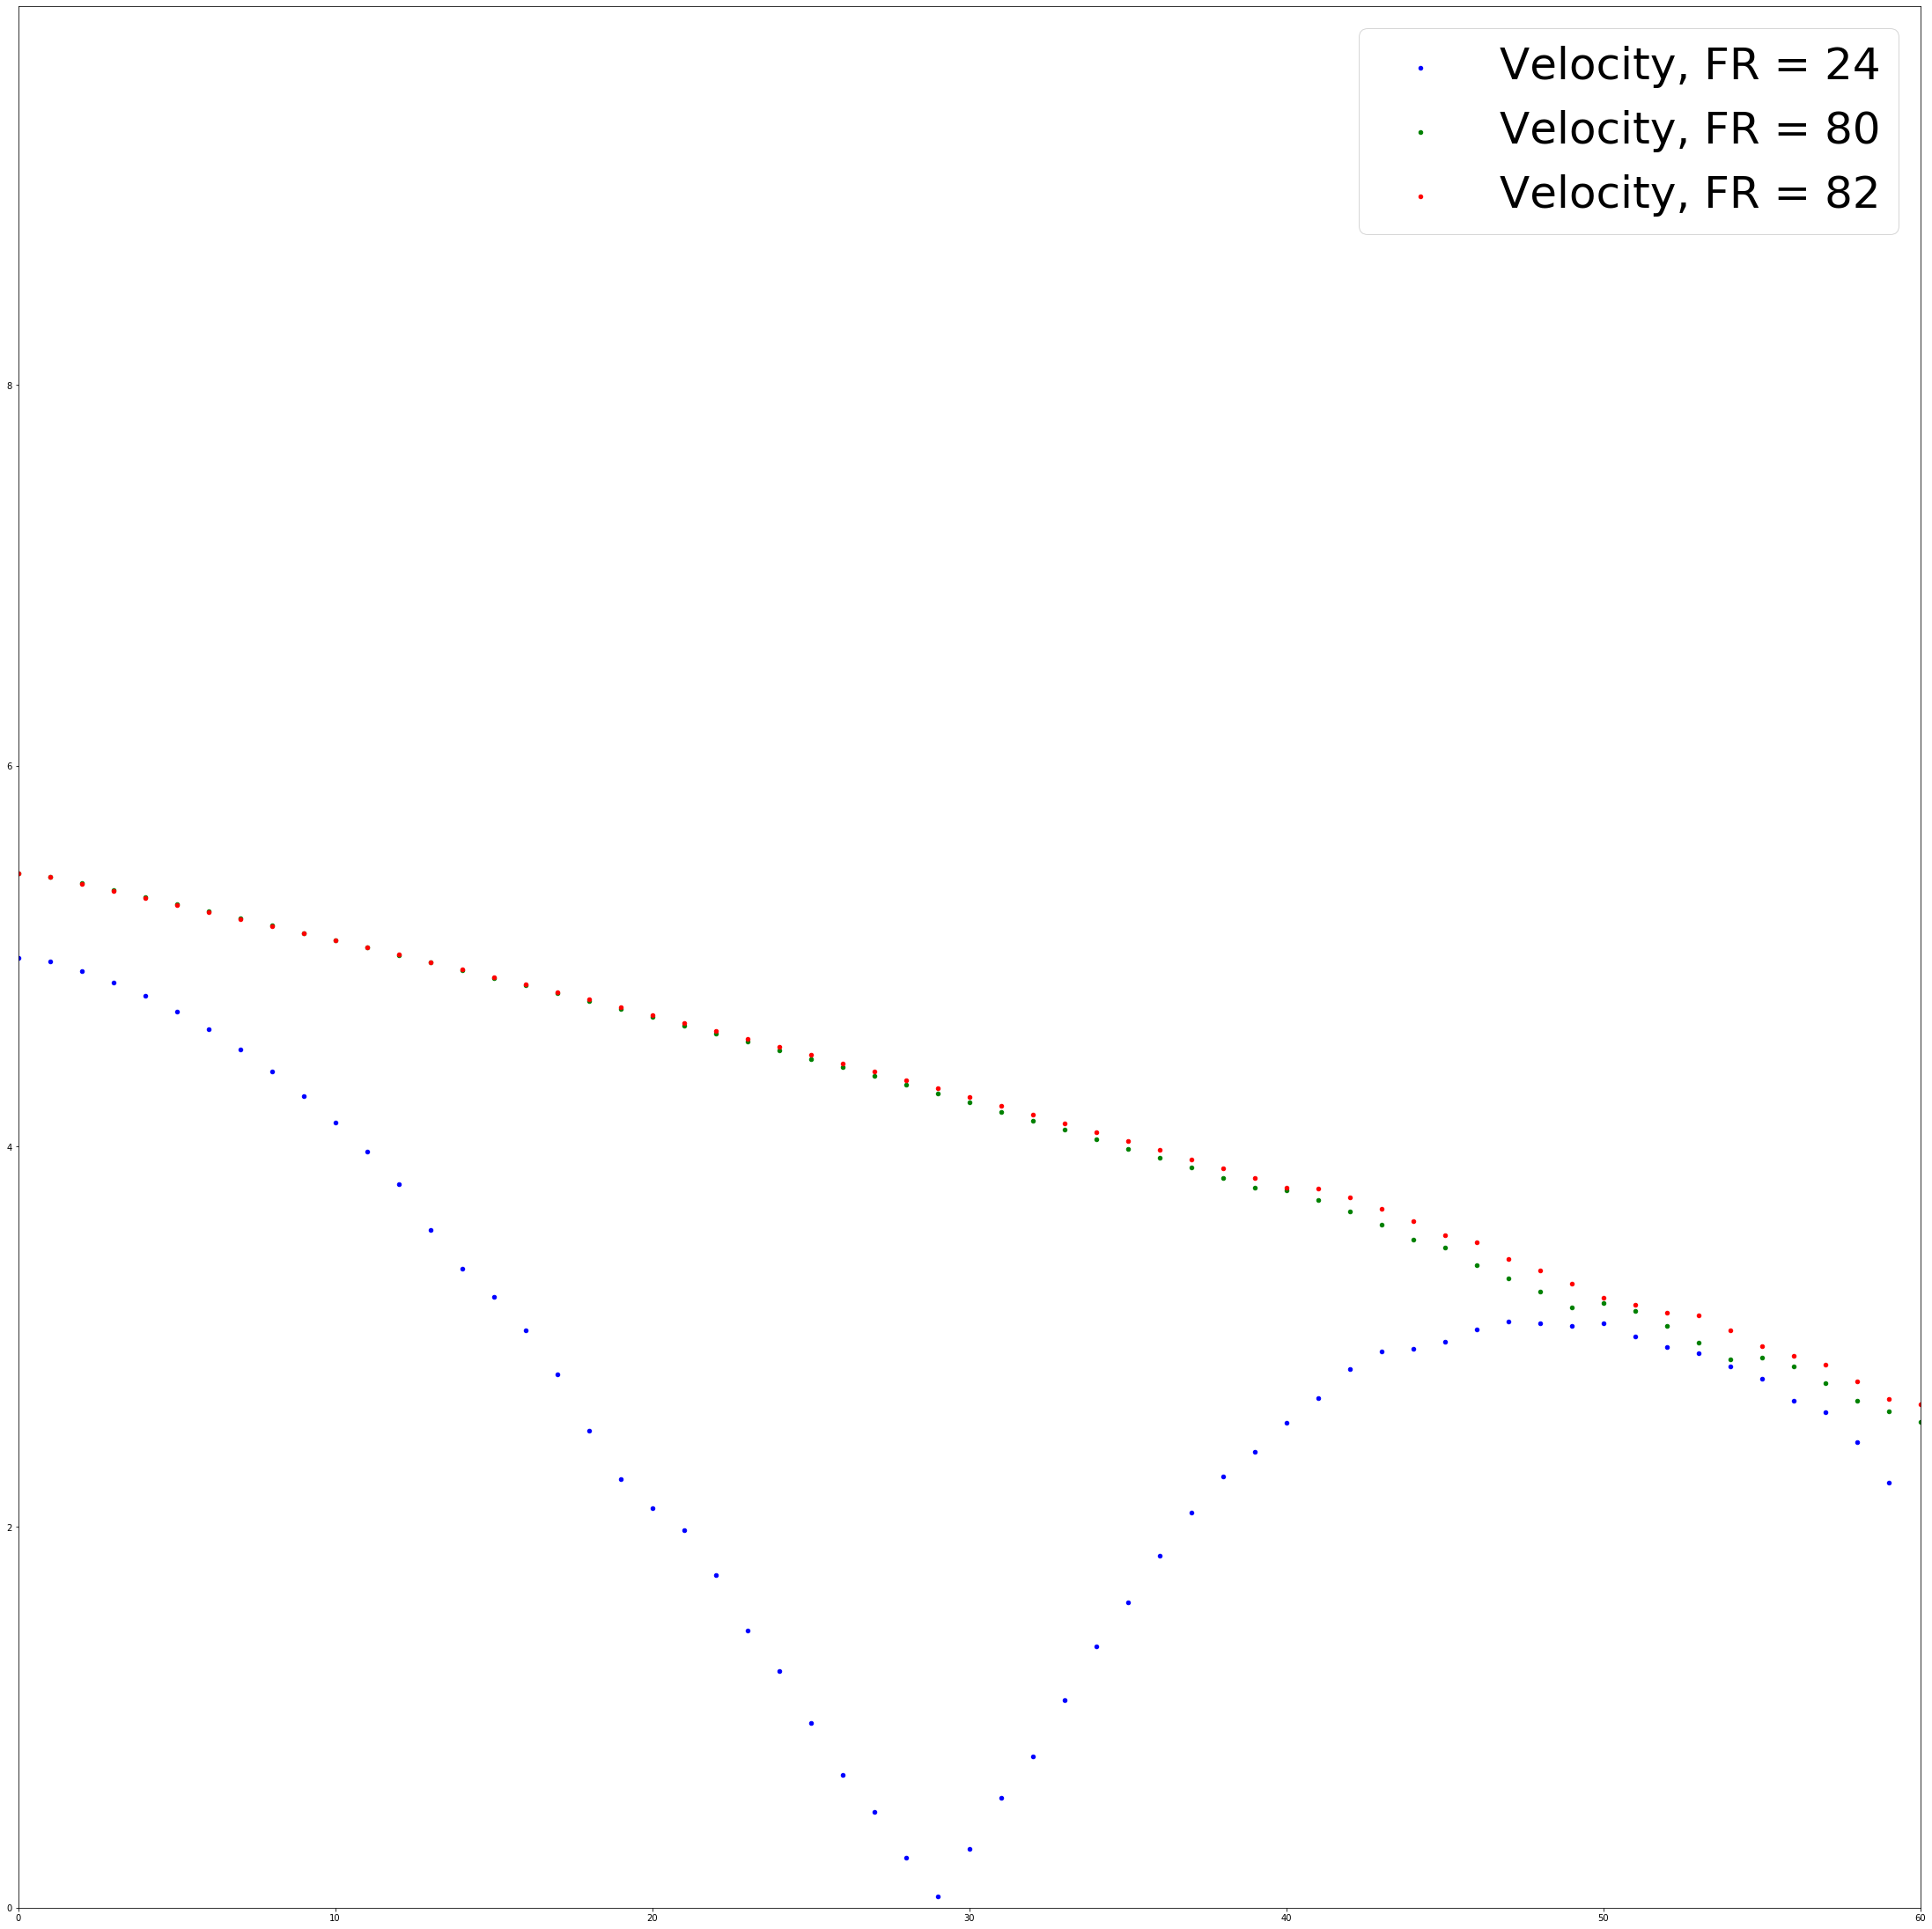

In [17]:
curve_plotting_v2.PlotCurveMultiple(2, [24, 80, 82], 3, 1, mode = 'velocity', zoom_range = range(0, 60))

LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_00...
LOG: Extracting coordinates for Animal CRV_02_TEST_01...
LOG: Extracting coordinates for Animal CRV_02_TEST_02...
LOG: Extracting coordinates for Animal CRV_02_TEST_03...
LOG: Extracting coordinates for Animal CRV_02_TEST_04...
LOG: Extracting coordinates for Animal CRV_02_TEST_05...
LOG: Extracting coordinates for Animal CRV_02_TEST_06...
LOG: Extracting coordinates for Animal CRV_02_TEST_07...
LOG: Extracting coordinates for Animal CRV_02_TEST_08...
LOG: Extracting coordinates for Animal CRV_02_TEST_09...
LOG: Extracting coordinates for Animal CRV_02_TEST_10...
LOG: Extracting coordinates for Animal CRV_02_TEST_11...
LOG: Extracting coordinates for Animal CRV_02_TEST_12...
LOG: Extracting coordinates for Animal CRV_02_TEST_13...
LOG: Extracting coordinates for Animal CRV_02_TEST_14...
LOG: Extracting coordinates for Animal CRV_02_TEST_15...
LOG: Extracting coordinates f

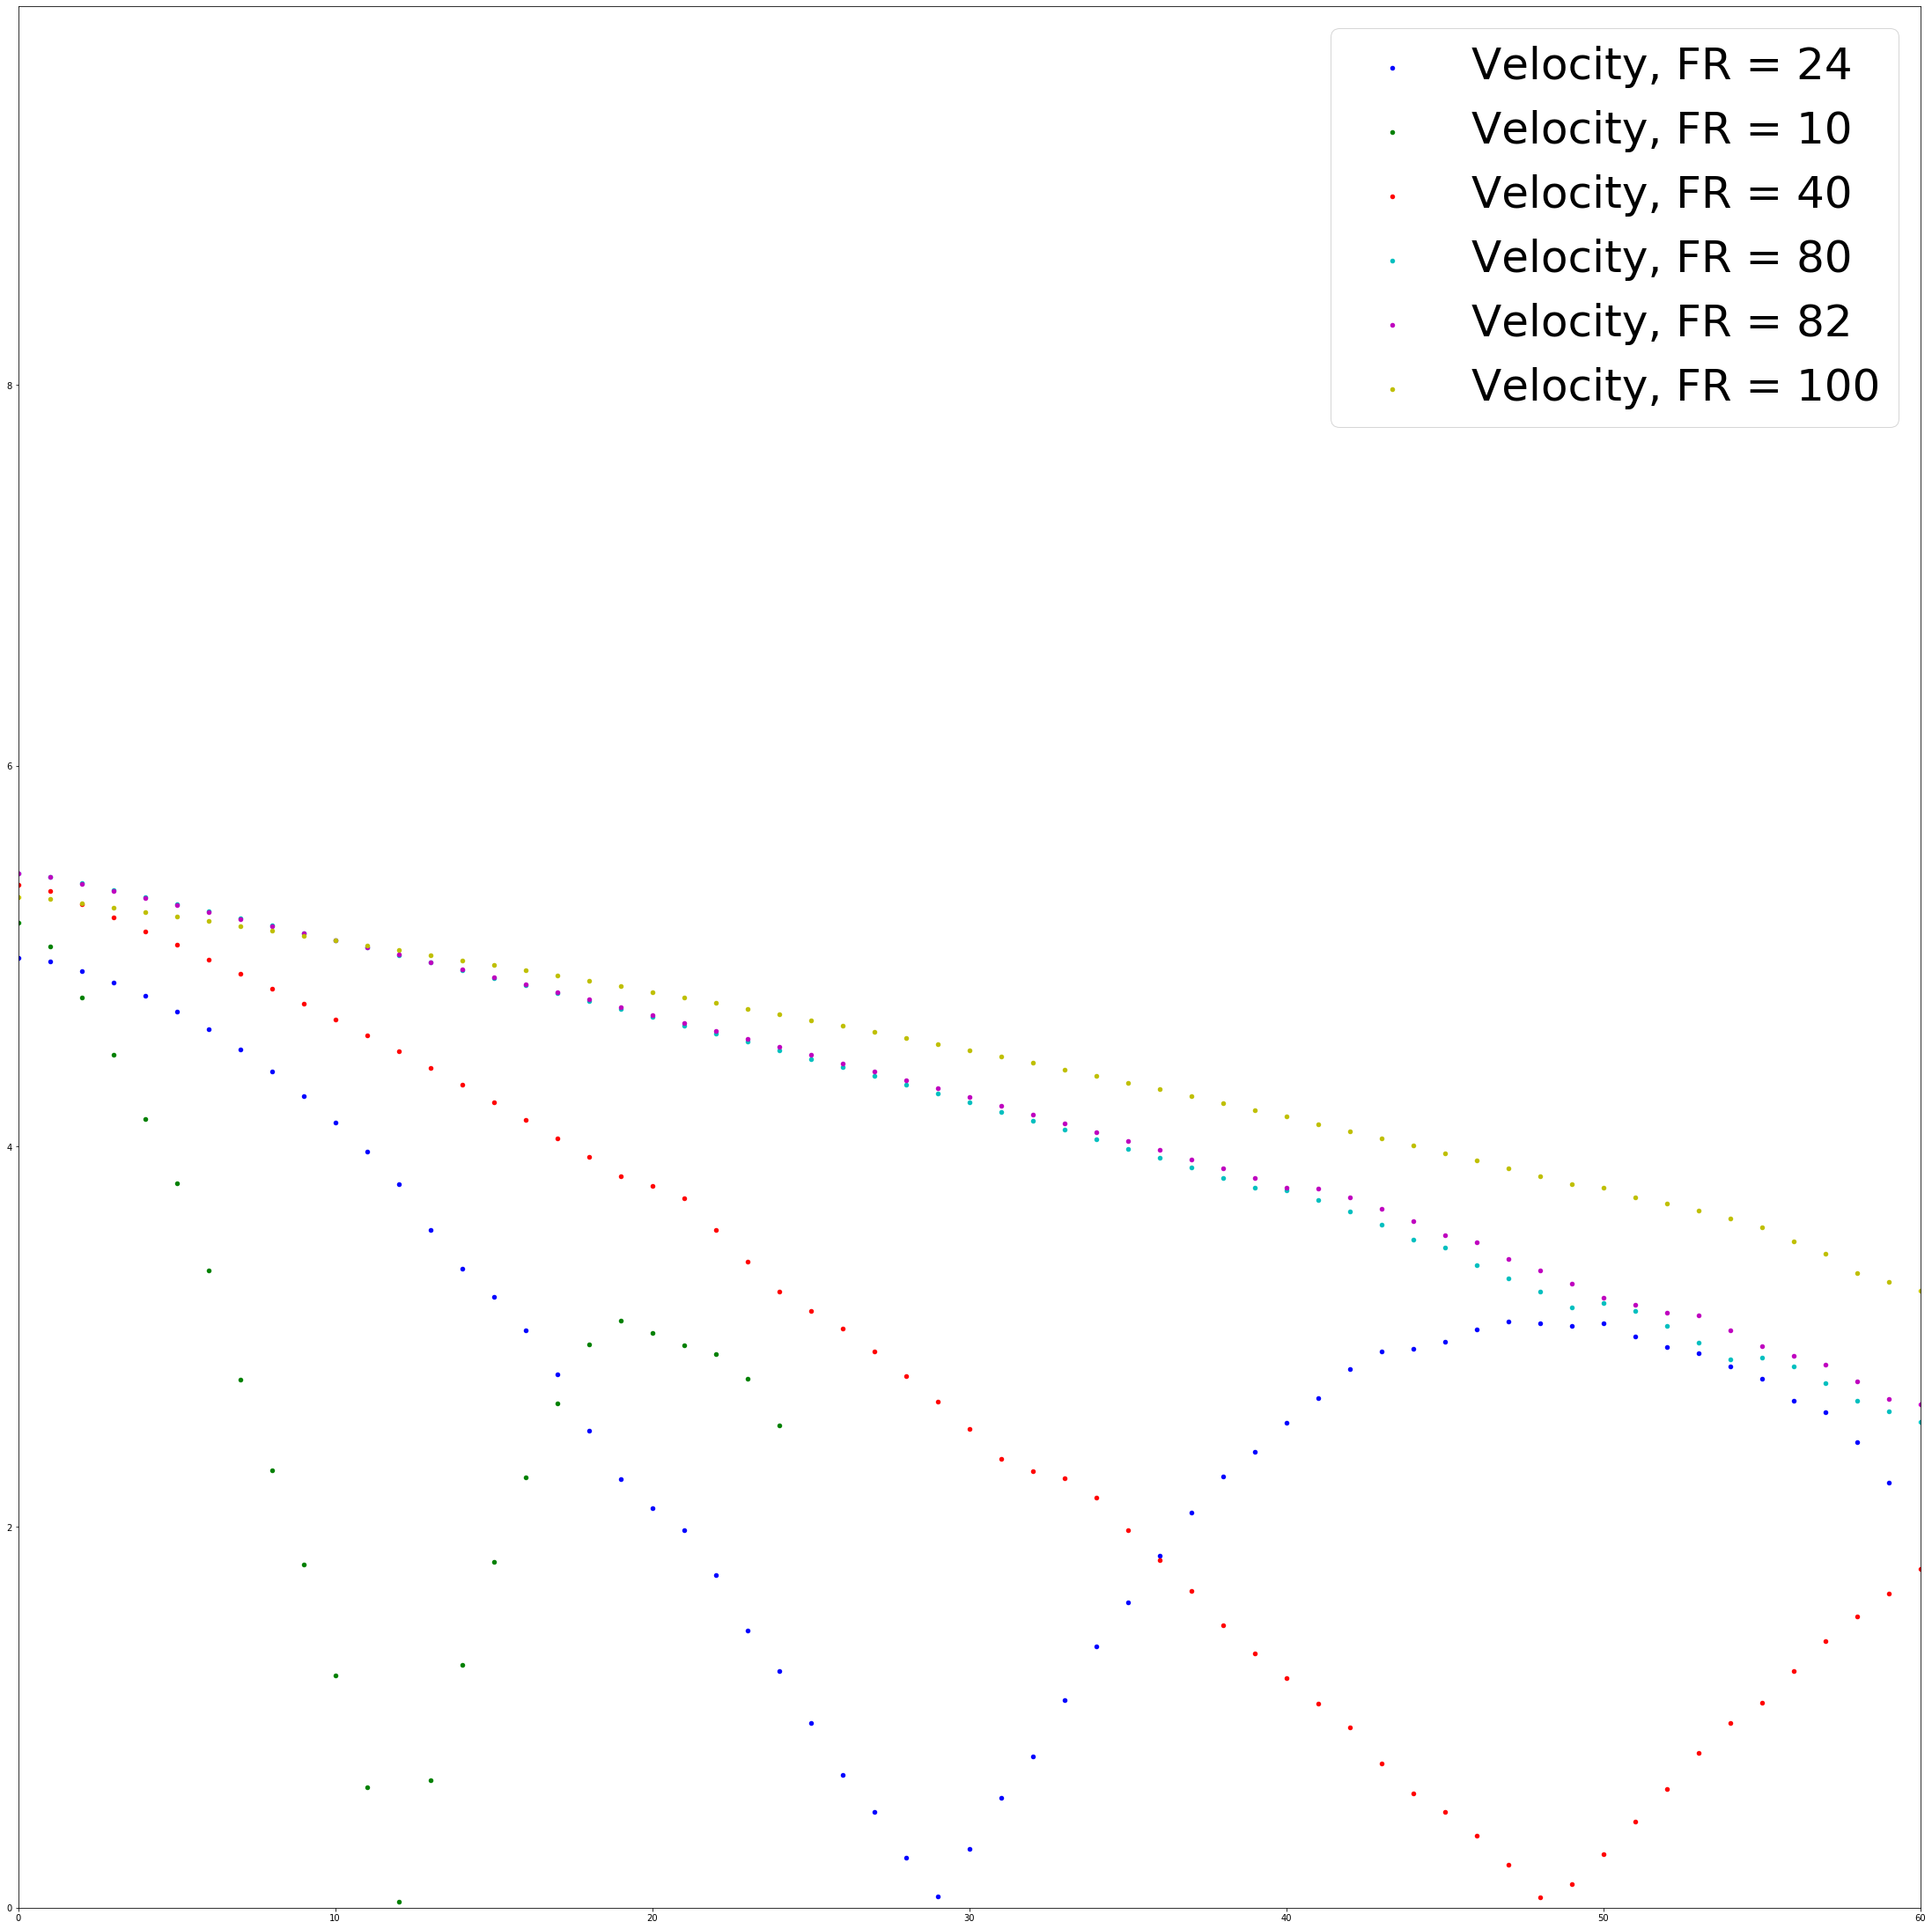

In [18]:
curve_plotting_v2.PlotCurveMultiple(2, [24, 10, 40, 80, 82, 100], 3, 1, mode = 'velocity', zoom_range = range(0, 60))

In [21]:
#curve 4 BDD decrease from 19 to 20
getAlignment(4, 19)
getAlignment(4, 20)
#consistently bigger sigm normalized curvature for FR = 24 (compared to 19), for FR = 20 and 19 similar

LOG: Extracting coordinates for Animal CRV_04_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_04_TEST_00...
LOG: Extracting coordinates for Animal CRV_04_TEST_01...
LOG: Extracting coordinates for Animal CRV_04_TEST_02...
LOG: Extracting coordinates for Animal CRV_04_TEST_03...
LOG: Extracting coordinates for Animal CRV_04_TEST_04...
LOG: Extracting coordinates for Animal CRV_04_TEST_05...
LOG: Extracting coordinates for Animal CRV_04_TEST_06...
LOG: Extracting coordinates for Animal CRV_04_TEST_07...
LOG: Extracting coordinates for Animal CRV_04_TEST_08...
LOG: Extracting coordinates for Animal CRV_04_TEST_09...
LOG: Extracting coordinates for Animal CRV_04_TEST_10...
LOG: Extracting coordinates for Animal CRV_04_TEST_11...
LOG: Extracting coordinates for Animal CRV_04_TEST_12...
LOG: Extracting coordinates for Animal CRV_04_TEST_13...
LOG: Extracting coordinates for Animal CRV_04_TEST_14...
LOG: Extracting coordinates for Animal CRV_04_TEST_15...
LOG: Extracting coordinates f

LOG: Extracting coordinates for Animal CRV_04_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_04_TEST_00...
LOG: Extracting coordinates for Animal CRV_04_TEST_01...
LOG: Extracting coordinates for Animal CRV_04_TEST_02...
LOG: Extracting coordinates for Animal CRV_04_TEST_03...
LOG: Extracting coordinates for Animal CRV_04_TEST_04...
LOG: Extracting coordinates for Animal CRV_04_TEST_05...
LOG: Extracting coordinates for Animal CRV_04_TEST_06...
LOG: Extracting coordinates for Animal CRV_04_TEST_07...
LOG: Extracting coordinates for Animal CRV_04_TEST_08...
LOG: Extracting coordinates for Animal CRV_04_TEST_09...
LOG: Extracting coordinates for Animal CRV_04_TEST_10...
LOG: Extracting coordinates for Animal CRV_04_TEST_11...
LOG: Extracting coordinates for Animal CRV_04_TEST_12...
LOG: Extracting coordinates for Animal CRV_04_TEST_13...
LOG: Extracting coordinates for Animal CRV_04_TEST_14...
LOG: Extracting coordinates for Animal CRV_04_TEST_15...
LOG: Extracting coordinates f

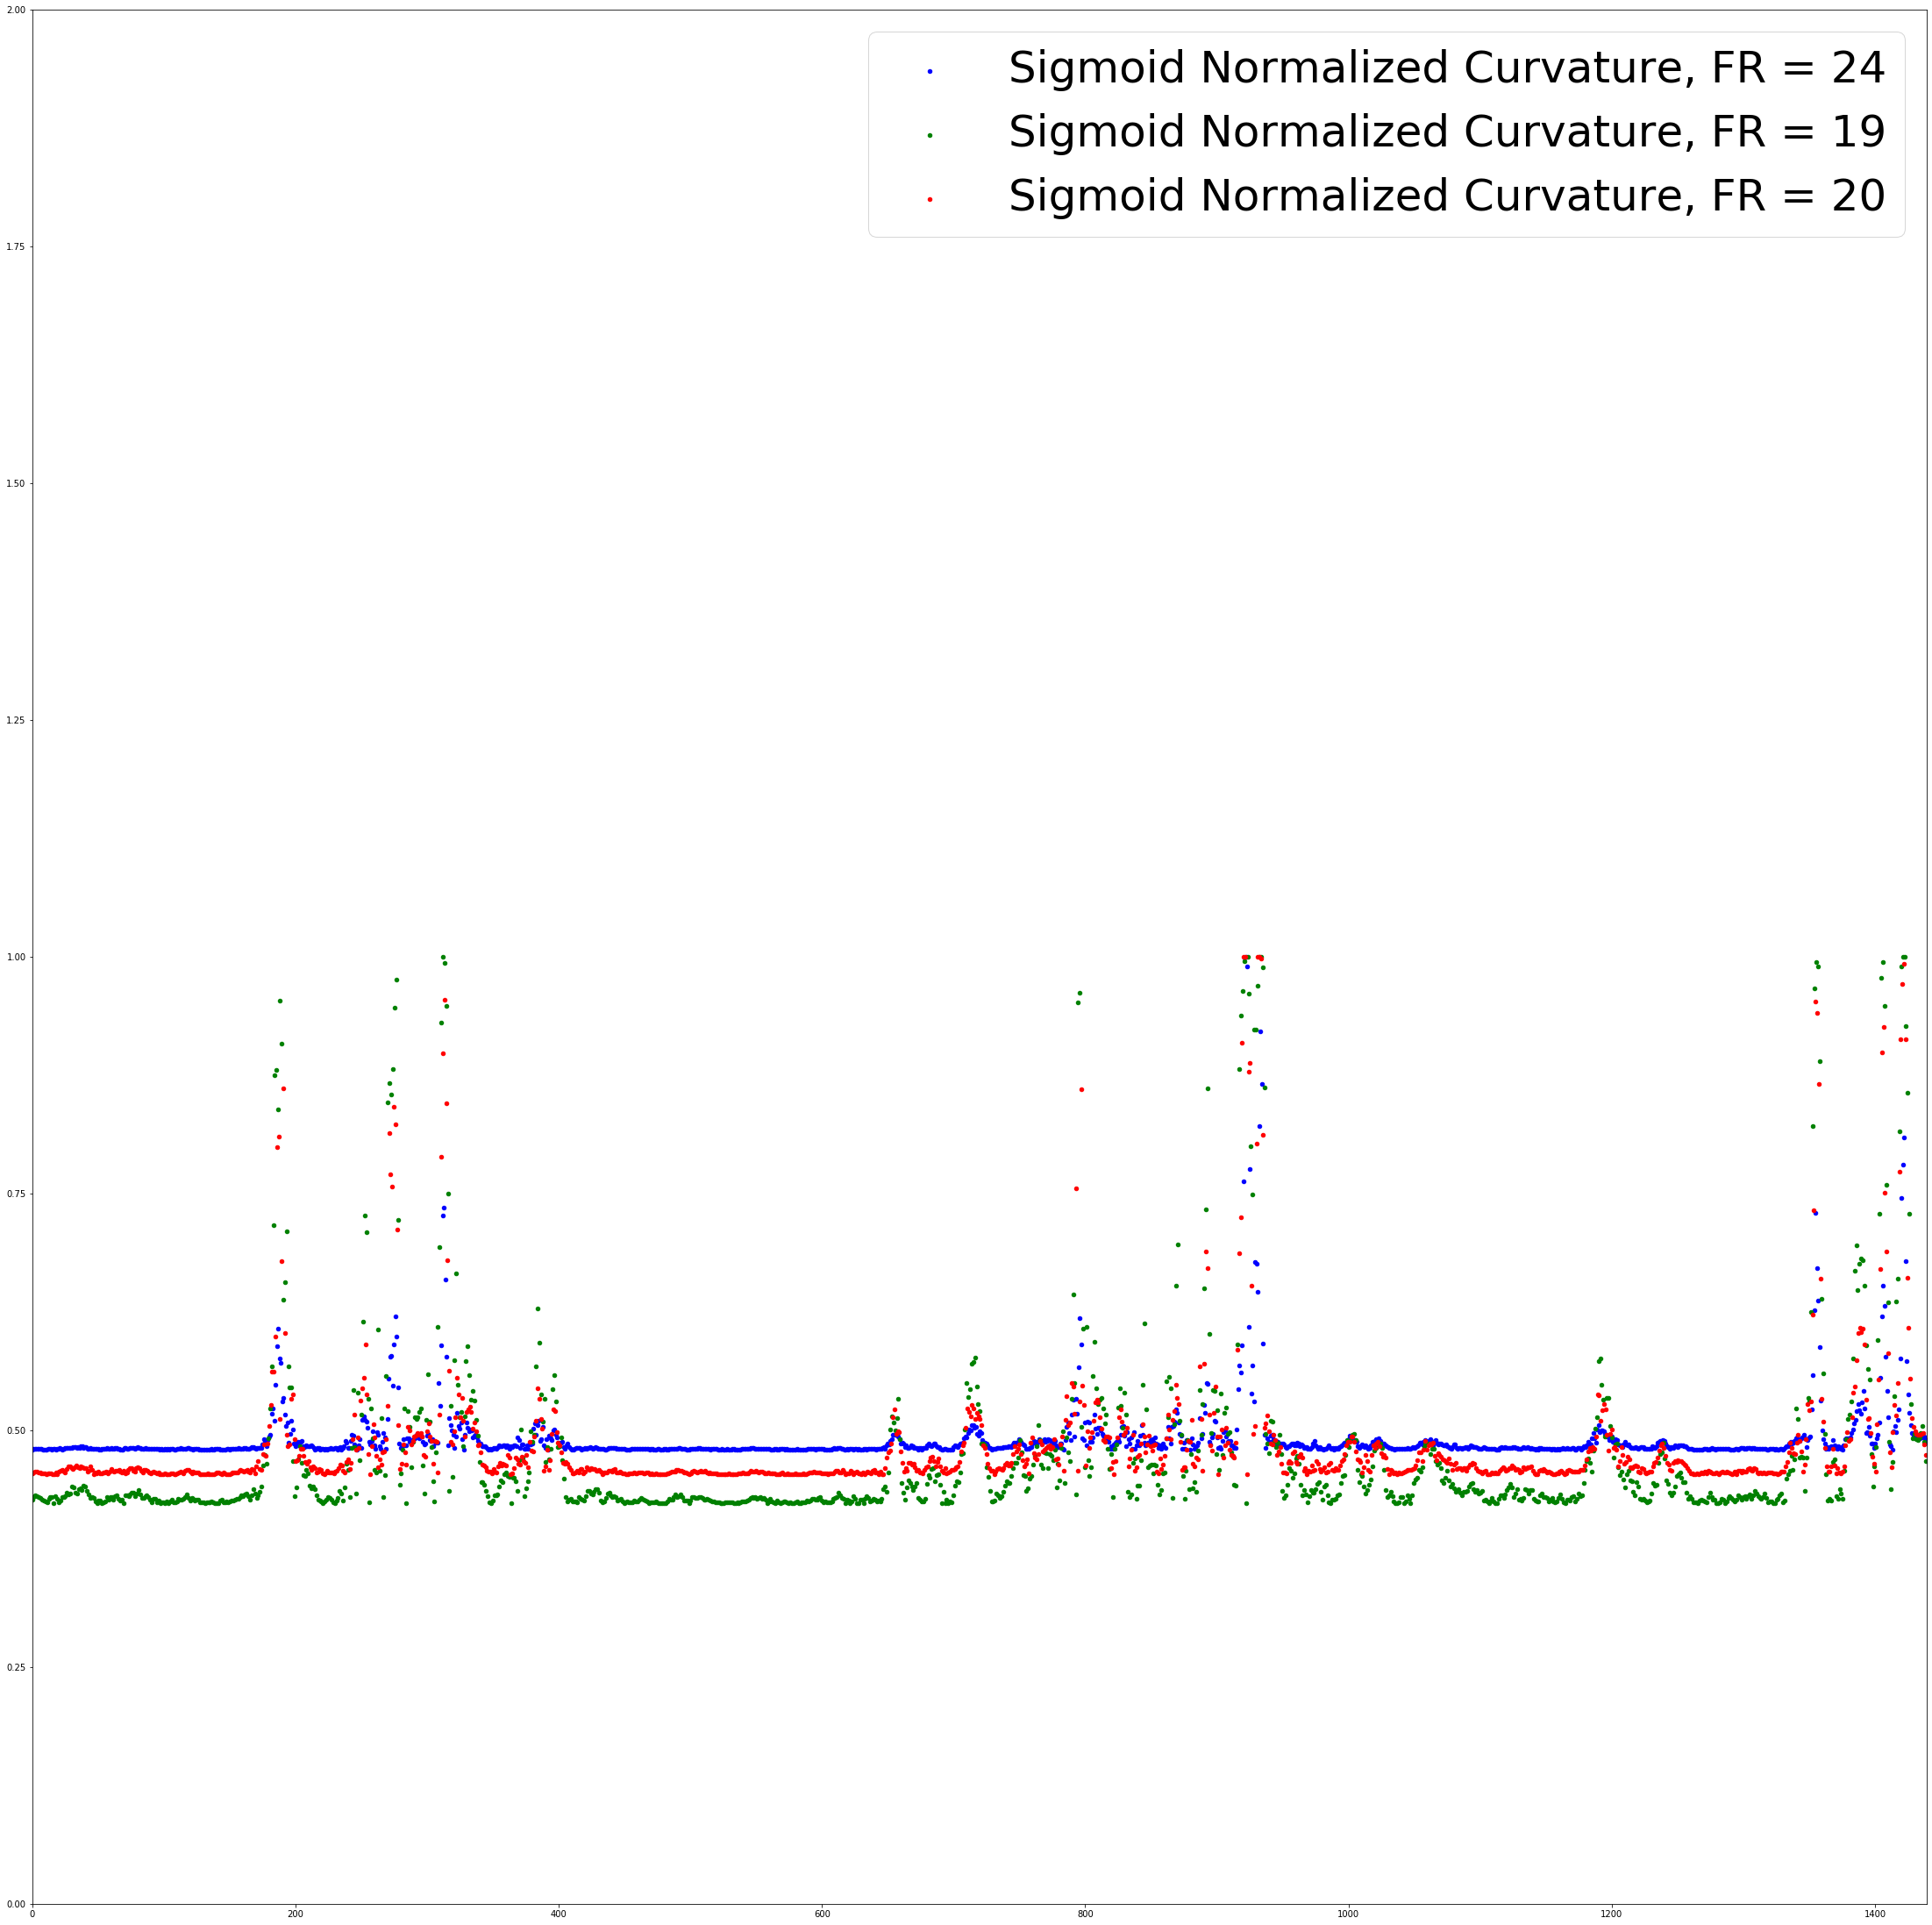

In [23]:
curve_plotting_v2.PlotCurveMultiple(4, [24, 19, 20], 3, 1, mode = 'sigmoid normalized curvature', zoom_range = range(0, 1440))

#sigm norm curvature fr fr19 < fr20 < fr24

LOG: Extracting coordinates for Animal CRV_04_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_04_TEST_00...
LOG: Extracting coordinates for Animal CRV_04_TEST_01...
LOG: Extracting coordinates for Animal CRV_04_TEST_02...
LOG: Extracting coordinates for Animal CRV_04_TEST_03...
LOG: Extracting coordinates for Animal CRV_04_TEST_04...
LOG: Extracting coordinates for Animal CRV_04_TEST_05...
LOG: Extracting coordinates for Animal CRV_04_TEST_06...
LOG: Extracting coordinates for Animal CRV_04_TEST_07...
LOG: Extracting coordinates for Animal CRV_04_TEST_08...
LOG: Extracting coordinates for Animal CRV_04_TEST_09...
LOG: Extracting coordinates for Animal CRV_04_TEST_10...
LOG: Extracting coordinates for Animal CRV_04_TEST_11...
LOG: Extracting coordinates for Animal CRV_04_TEST_12...
LOG: Extracting coordinates for Animal CRV_04_TEST_13...
LOG: Extracting coordinates for Animal CRV_04_TEST_14...
LOG: Extracting coordinates for Animal CRV_04_TEST_15...
LOG: Extracting coordinates f

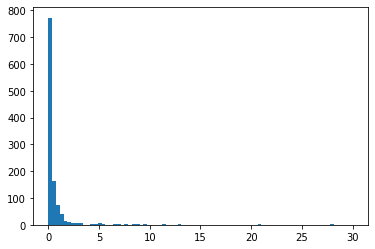

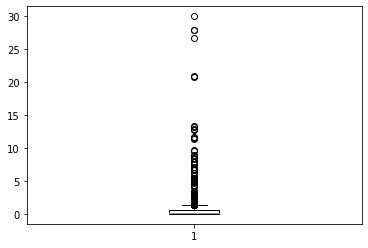

mean = 0.740595080906818
median = 0.1323764557958299
standard deviation = 2.376669104294712
quartiles = [0.04154027 0.13237646 0.54264786]


In [24]:
curve4_fr19_curv = curve_plotting_v2.GetCurveStats(4, 19, 3, 1, mode = 'curvature')
curve4_fr19_curv 
print( 'mean = ' + str(st.mean(curve4_fr19_curv)))
print('median = ' + str(st.median(curve4_fr19_curv)))
print( 'standard deviation = ' + str(st.stdev(curve4_fr19_curv)))
print('quartiles = ' + str(np.percentile(curve4_fr19_curv, [25, 50, 75])))

LOG: Extracting coordinates for Animal CRV_04_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_04_TEST_00...
LOG: Extracting coordinates for Animal CRV_04_TEST_01...
LOG: Extracting coordinates for Animal CRV_04_TEST_02...
LOG: Extracting coordinates for Animal CRV_04_TEST_03...
LOG: Extracting coordinates for Animal CRV_04_TEST_04...
LOG: Extracting coordinates for Animal CRV_04_TEST_05...
LOG: Extracting coordinates for Animal CRV_04_TEST_06...
LOG: Extracting coordinates for Animal CRV_04_TEST_07...
LOG: Extracting coordinates for Animal CRV_04_TEST_08...
LOG: Extracting coordinates for Animal CRV_04_TEST_09...
LOG: Extracting coordinates for Animal CRV_04_TEST_10...
LOG: Extracting coordinates for Animal CRV_04_TEST_11...
LOG: Extracting coordinates for Animal CRV_04_TEST_12...
LOG: Extracting coordinates for Animal CRV_04_TEST_13...
LOG: Extracting coordinates for Animal CRV_04_TEST_14...
LOG: Extracting coordinates for Animal CRV_04_TEST_15...
LOG: Extracting coordinates f

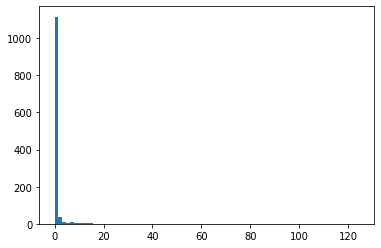

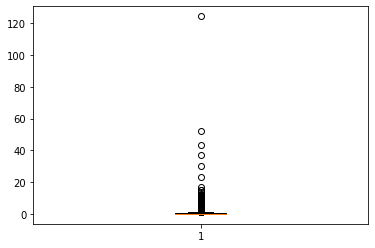

mean = 0.8654411472666473
median = 0.13208054740344902
standard deviation = 4.6178594679330125
quartiles = [0.04218359 0.13208055 0.56733397]


In [25]:
curve4_fr20_curv = curve_plotting_v2.GetCurveStats(4, 20, 3, 1, mode = 'curvature')
curve4_fr20_curv 
print( 'mean = ' + str(st.mean(curve4_fr20_curv)))
print('median = ' + str(st.median(curve4_fr20_curv)))
print( 'standard deviation = ' + str(st.stdev(curve4_fr20_curv)))
print('quartiles = ' + str(np.percentile(curve4_fr20_curv, [25, 50, 75])))

LOG: Extracting coordinates for Animal CRV_04_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_04_TEST_00...
LOG: Extracting coordinates for Animal CRV_04_TEST_01...
LOG: Extracting coordinates for Animal CRV_04_TEST_02...
LOG: Extracting coordinates for Animal CRV_04_TEST_03...
LOG: Extracting coordinates for Animal CRV_04_TEST_04...
LOG: Extracting coordinates for Animal CRV_04_TEST_05...
LOG: Extracting coordinates for Animal CRV_04_TEST_06...
LOG: Extracting coordinates for Animal CRV_04_TEST_07...
LOG: Extracting coordinates for Animal CRV_04_TEST_08...
LOG: Extracting coordinates for Animal CRV_04_TEST_09...
LOG: Extracting coordinates for Animal CRV_04_TEST_10...
LOG: Extracting coordinates for Animal CRV_04_TEST_11...
LOG: Extracting coordinates for Animal CRV_04_TEST_12...
LOG: Extracting coordinates for Animal CRV_04_TEST_13...
LOG: Extracting coordinates for Animal CRV_04_TEST_14...
LOG: Extracting coordinates for Animal CRV_04_TEST_15...
LOG: Extracting coordinates f

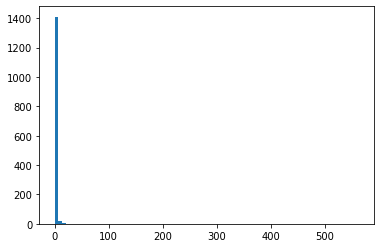

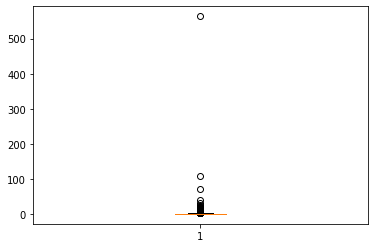

mean = 1.2555161946600608
median = 0.12966147550086715
standard deviation = 15.41117748537481
quartiles = [0.039387   0.12966148 0.53820212]


In [26]:
curve4_fr24_curv = curve_plotting_v2.GetCurveStats(4, 24, 3, 1, mode = 'curvature')
curve4_fr24_curv 
print( 'mean = ' + str(st.mean(curve4_fr24_curv)))
print('median = ' + str(st.median(curve4_fr24_curv)))
print( 'standard deviation = ' + str(st.stdev(curve4_fr24_curv)))
print('quartiles = ' + str(np.percentile(curve4_fr24_curv, [25, 50, 75])))

In [ ]:
#again differences in sd, plus fr = 24 happens to have a high outlier curvature, and 20 also has high outl 
#curv (though mot as high), whereas fr = 19 doesn't